In [1]:
import numpy as np
import os
from astropy.io import fits
from astropy import wcs
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from scipy.optimize import curve_fit
import optical_overlay_plots as oop
import source_search as ss
import co_masses as co
import mstar_sfr as ms
from matplotlib.patches import Rectangle, Ellipse
import scipy.odr as odr

from photutils.aperture import SkyCircularAperture as sca
from photutils.aperture import aperture_photometry

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo75 = FlatLambdaCDM(H0=75, Om0=0.3)

# beam -> specprof -> mom0 -> mom0region -> specprof

In [2]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/CDFS/CDFS-1/calibrated')
fitsfiles = glob.glob('*.fits')
for i in range(len(fitsfiles)):
    print("{}, {}".format(i, fitsfiles[i]))

0, DESopticalCDFS1.fits
1, cdfs1rechan.fromspec.mom0.fits
2, cdfs1rechan.fits
3, cdfs1_150kms_rechan_full.bkg.mom0.fits
4, cdfs1rechan_full.fits
5, cdfs1rechan_full.mom1.fits
6, cdfs1rechan.mom0.fits
7, cdfs1continuummfs.fits


In [3]:
mom1idx = 5
optidx = 0
mom0idx = 3

In [4]:
co.get_beam_crtf(fitsfiles[mom0idx], 2)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
z = np.array([1.0032895, 0.45659, 0.64986914, 0.78256, 0.20429, 1.03458, 0.21201, 0.34459, 1.08807, 0.8068, 0.72811, 
              0.65665, 0.56395, 1.19372, 0.74744, 0.28907, 0.21505, 0.80761, 0.45114, 0.69484, 0.67603, 0.59499, 0.31894, 
              0.34224, 0.35673]) 
z=z[0]
z

1.0032895

In [6]:
txtfiles = glob.glob('*specprof.txt')
for i in range(len(txtfiles)):
    print("{} {}".format(i, txtfiles[i]))

0 cdfs1rechan.image.pbcor.specprof.txt
1 xmm3_100kms_rechan_bkg.beamreg.2sig.specprof.txt
2 cdfs1rechan.2sig.beamregion.specprof.txt
3 cdfs1_150kms_bkg_92_114.specprof.txt
4 cdfs1rechan.mom0region.specprof.txt
5 cdfs1rechan.beamregion.specprof.txt
6 cdfs1_150kms_rechan_bkg_91_113.beamregion.2sig.specprof.txt


In [7]:
goodtxt = txtfiles[4]

rmssigval: 0.003
chi-squared for one Gaussian: 1.725
chi-squared for two Gaussians: 1.009
using a two-gaussian fit: False
One-gaussian integrated flux: 1.491e+01 Jy km/s
Two-gaussian integrated flux: 1.433e+01 Jy km/s
hzmean (usetwog false): 137589177486.33563 Hz
area from calculation: 1.491e+01
uncertainty on area: 1.226e+00
-50.891726554681625
1-gaussian FWHM: 2.399e+02
-530.6163211707071 428.83286806134385
'40~77'
-511.294346300089 413.7056536988918


<IPython.core.display.Javascript object>


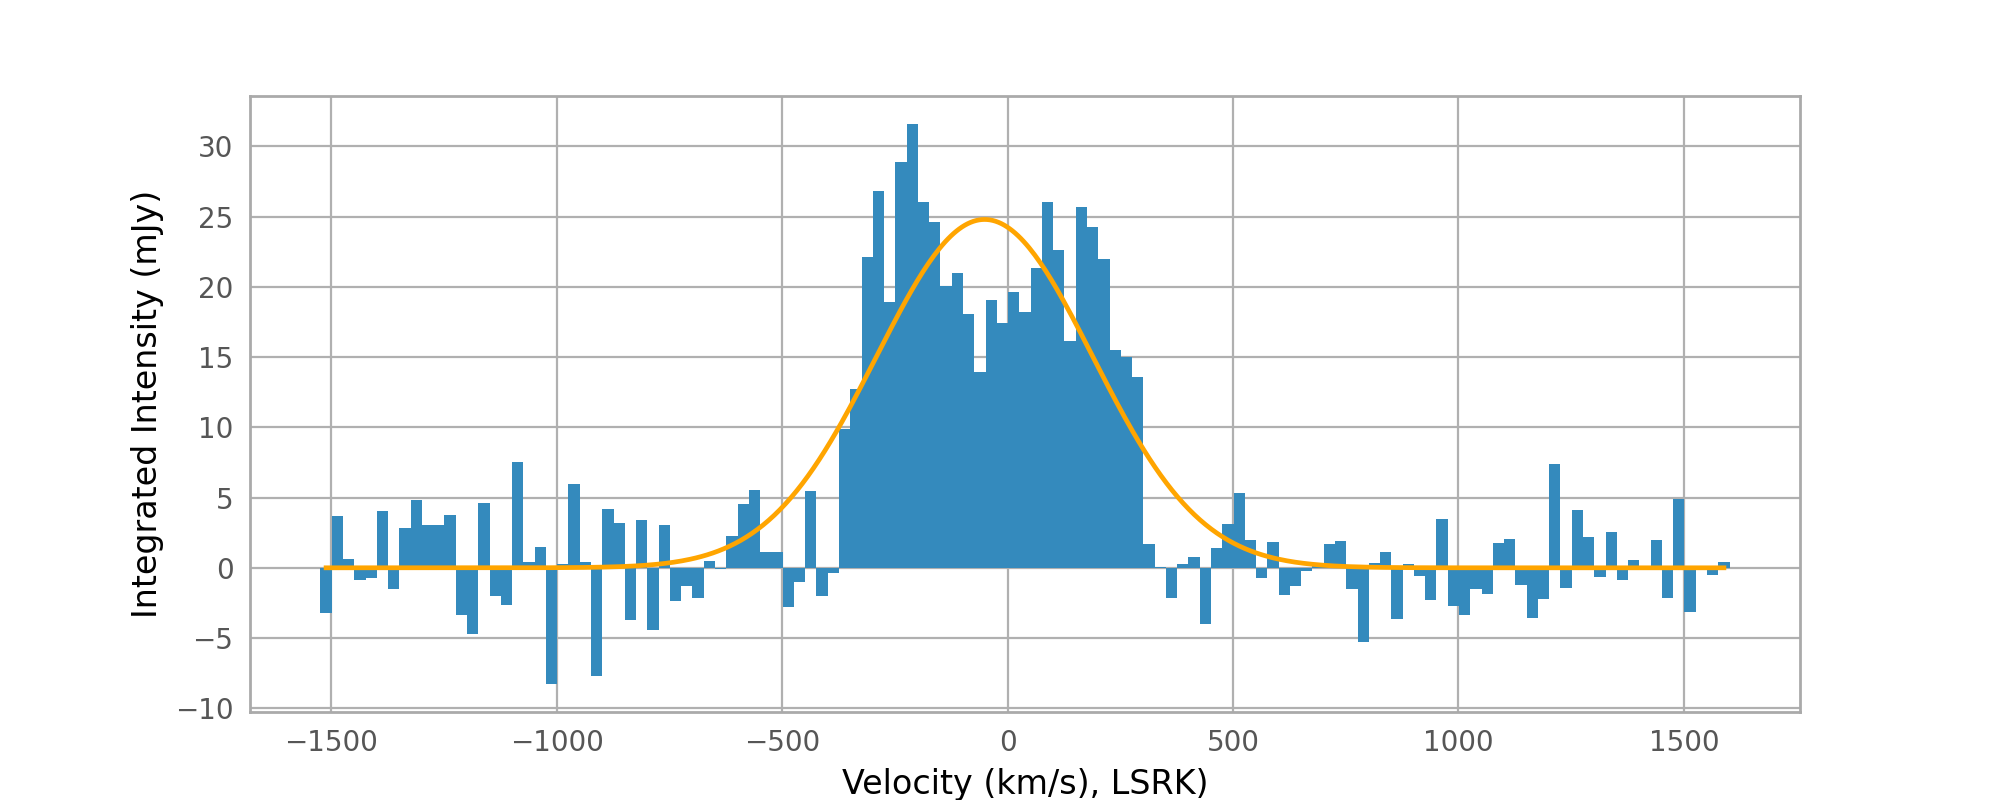

rmssigval: 0.003
chi-squared for one Gaussian: 1.725
chi-squared for two Gaussians: 1.009
using a two-gaussian fit: False
One-gaussian integrated flux: 1.491e+01 Jy km/s
Two-gaussian integrated flux: 1.433e+01 Jy km/s
hzmean (usetwog false): 137589177486.33563 Hz
area from calculation: 1.491e+01
uncertainty on area: 1.226e+00
RMS value: 0.0034223597445858026
137589177486.33563 Hz
uncertainty on nuobs: 1.491e+01
4082.1037134448984 Mpc
line luminosity: 9.061e+10
dnuobs, nuobs: 14.908039489598451, 137589177486.33563
uncertainty on line luminosity: 7.450e+09
uncertainty on gas mass: 8.764e+09
Gas mass: 1.066E+11


/Users/dee/Documents/ALMA/alma_reduction/co_masses.py:435: RuntimeWarning: invalid value encountered in sqrt
  stdmat = np.sqrt(cov)


In [9]:
# if you want twofiles, rechanfile=25km/s profile, specfile (1st arg)=rebinned with larger channels file
%matplotlib notebook
co.get_mom0_chans(goodtxt, 2, z=0.67603, p0=[0.002, 100, 50, 0], linefree=(0, 20), zvals=(0, 200), n_gauss=1, centmean=False, plot=1, p02=[0.01, 0.01, 0, 10, 50, 50, 0], centline=False)#, bounds=(np.array([0, -500, 200, 0]), np.array([0.005, 0, 500, 10])))


In [10]:
optfile = glob.glob('DES*.fits')[0]
momfile = glob.glob('*.mom0.fits')[0]
momfile

'cdfs1rechan.fromspec.mom0.fits'

<IPython.core.display.Javascript object>


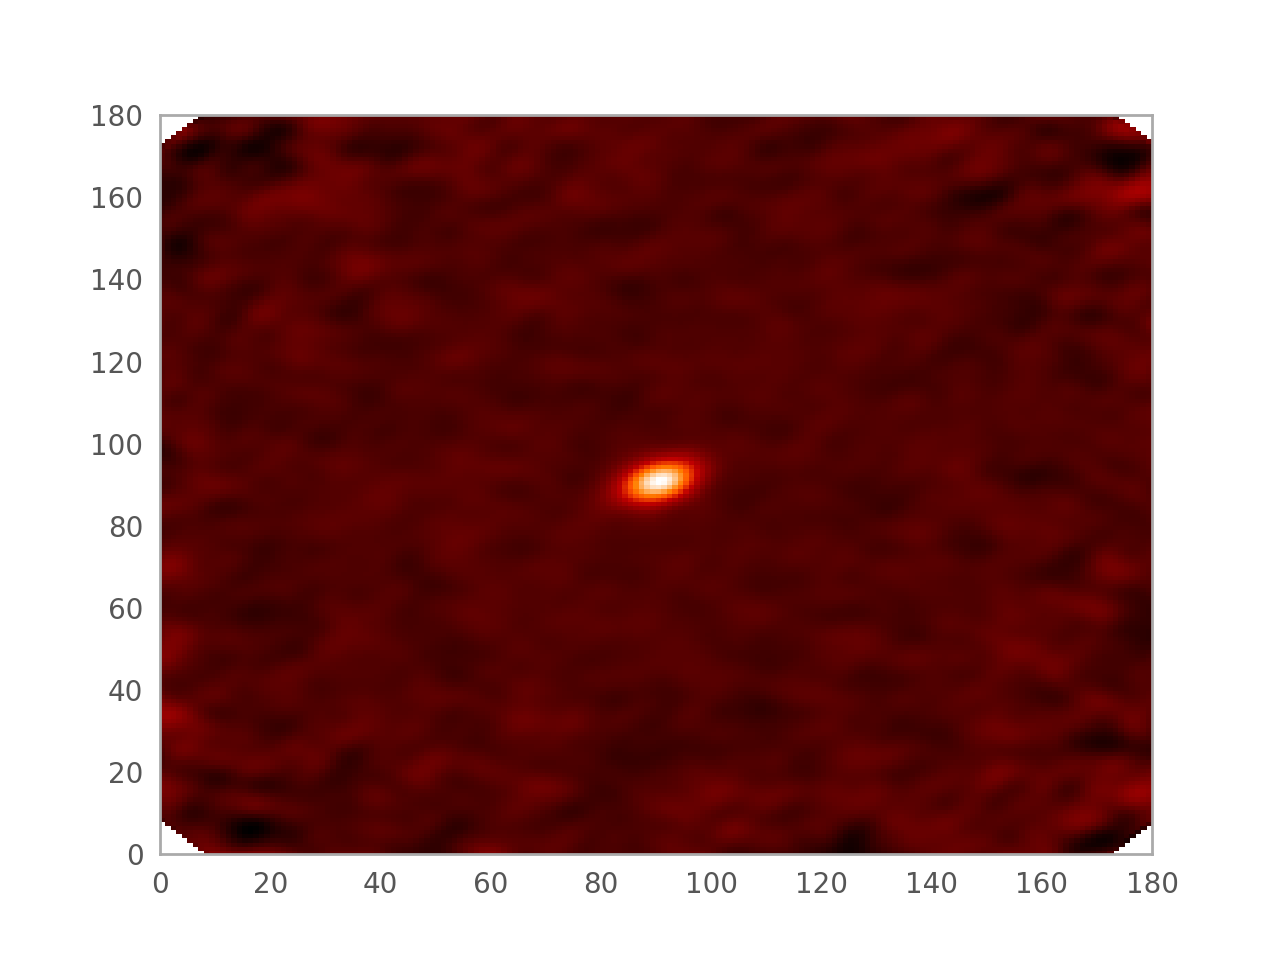

In [11]:
%matplotlib notebook

plt.pcolormesh(fits.open(momfile)[0].data[0,0,:,:])

<IPython.core.display.Javascript object>


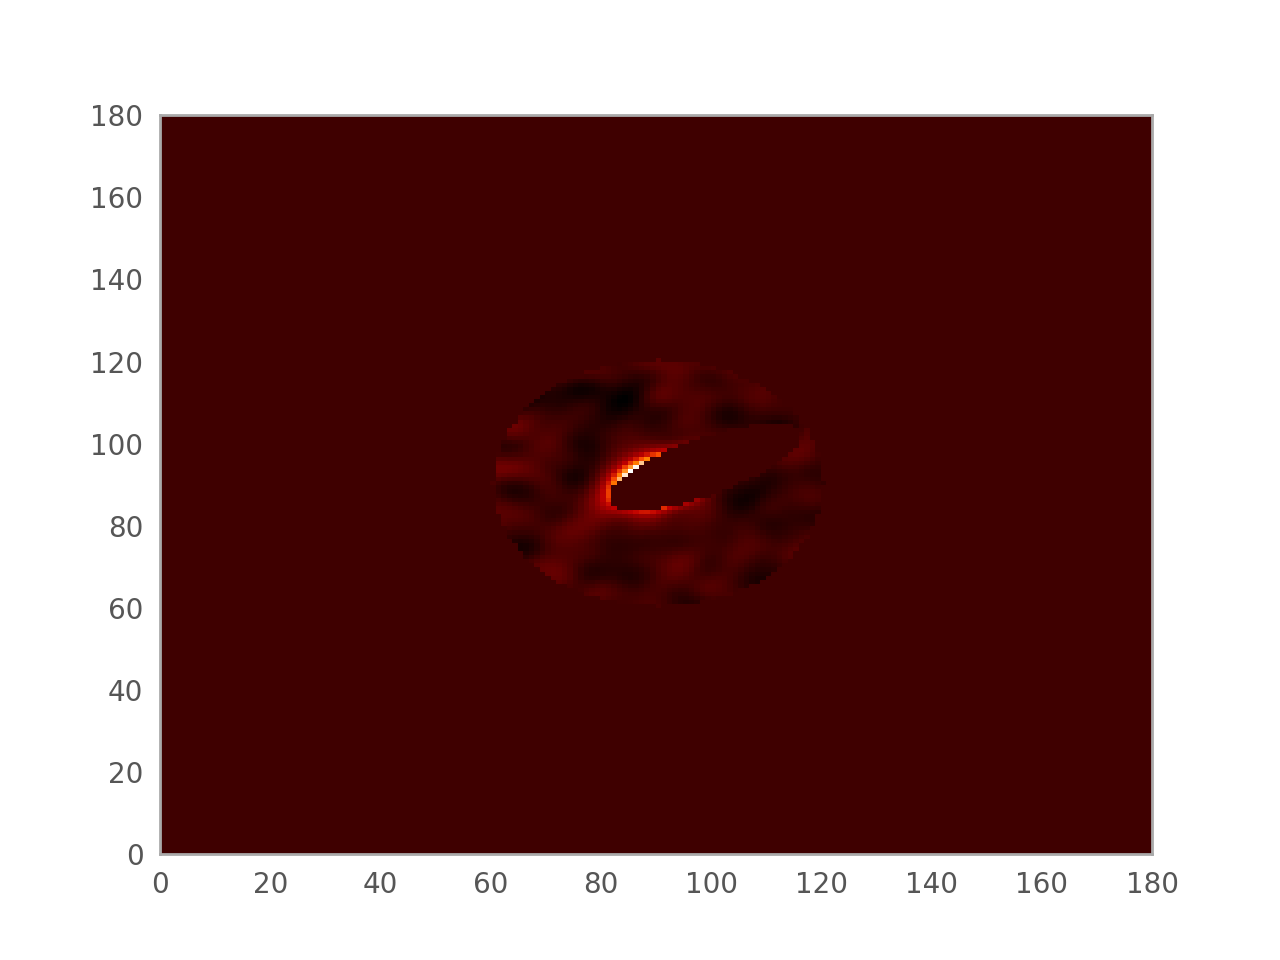

0.3821155359135269 12.006704494041822


(0.3821155359135269,
 12.006704494041822,
 98.4508879853982,
 94.01120678282007,
 array([86]),
 array([86]))

In [12]:
%matplotlib notebook

cutout = (75,87)
oop.find_SN_sigma(momfile, cutout, plot=True, rad=30)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


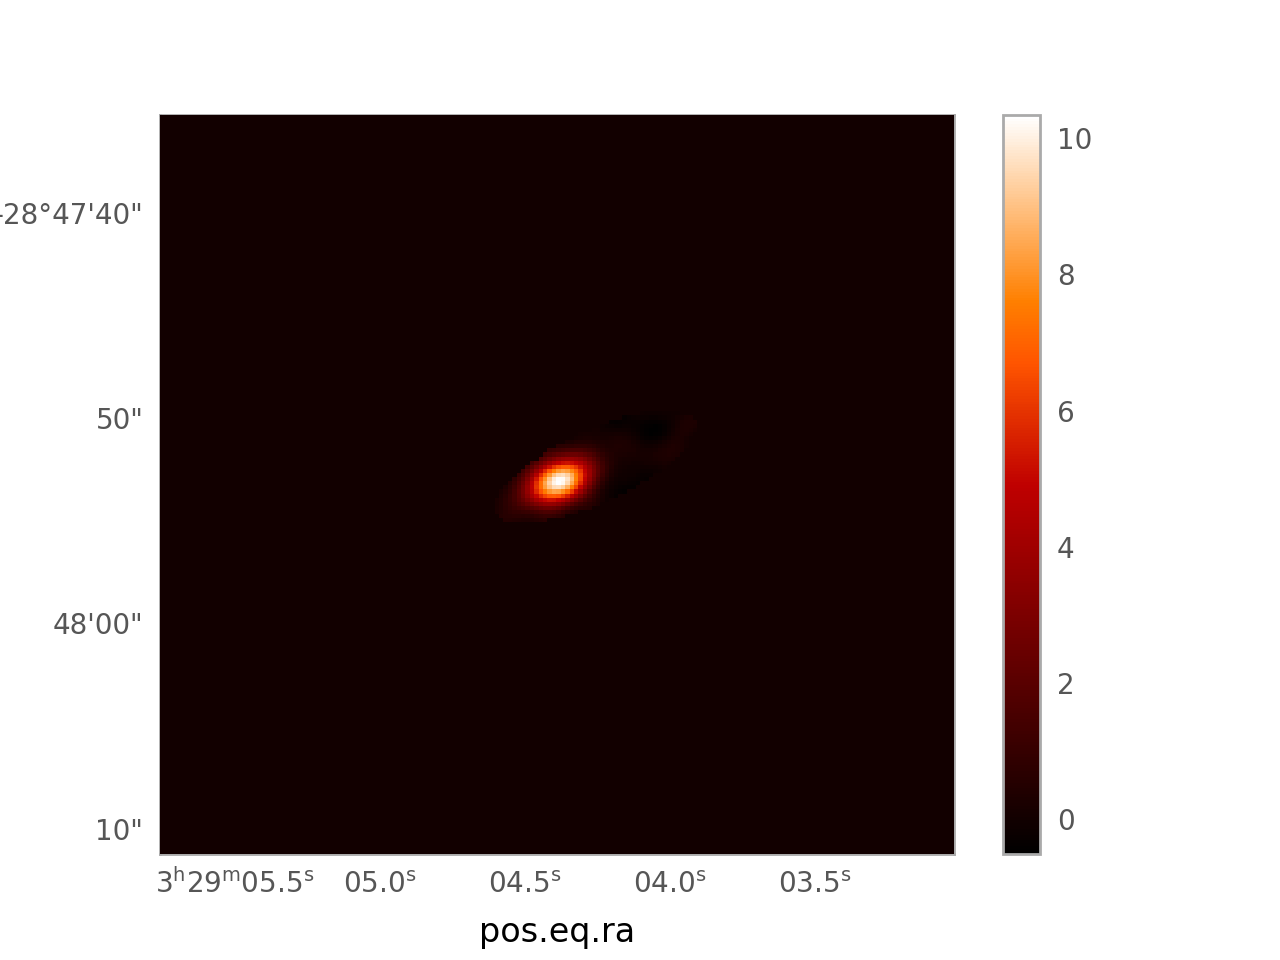

In [13]:
co.get_crtf(momfile, cutout, nstds=3)

In [14]:
mom0prof = glob.glob('*.mom0region.specprof.txt')
mom0prof

['cdfs1rechan.mom0region.specprof.txt']

In [15]:
txtfiles = glob.glob('*.beamregion.2sig.specprof.txt')
txtfiles
# for i in range(len(txtfiles)):
#     print("{} {}".format((i, txtfiles[i])))

['cdfs1_150kms_rechan_bkg_91_113.beamregion.2sig.specprof.txt']

<IPython.core.display.Javascript object>


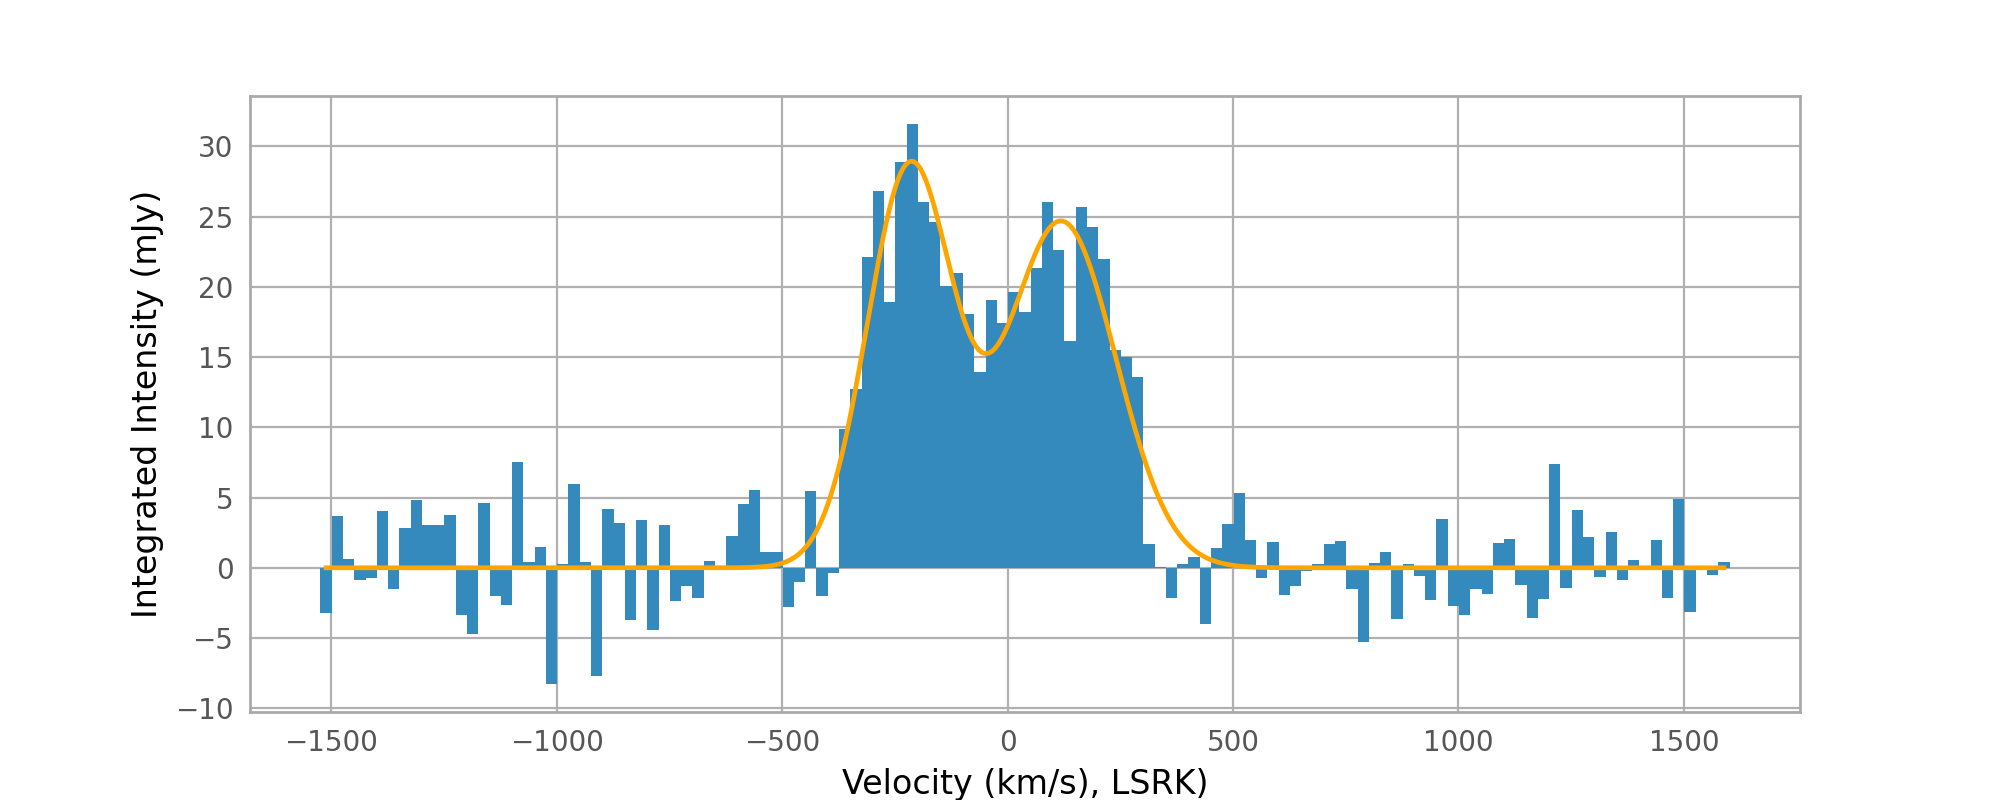

rmssigval: 0.003
chi-squared for one Gaussian: 1.206
chi-squared for two Gaussians: 1.382
using a two-gaussian fit: True
One-gaussian integrated flux: 1.491e+01 Jy km/s
Two-gaussian integrated flux: 1.422e+01 Jy km/s
hzmean (usetwog true) : 178878072075.9939 Hz
area from calculation: 1.422e+01
uncertainty on area: 1.109e+00
RMS value: 0.0029178734766036234
178878072075.9939 Hz
uncertainty on nuobs: 1.422e+01
1487.7428901090136 Mpc
line luminosity: 1.492e+10
dnuobs, nuobs: 14.217756624071408, 178878072075.99393
uncertainty on line luminosity: 1.163e+09
uncertainty on gas mass: 6.588e+09
gas mass: 8.448e+10


/Users/dee/Documents/ALMA/alma_reduction/co_masses.py:435: RuntimeWarning: invalid value encountered in sqrt
  stdmat = np.sqrt(cov)


In [16]:
z=0.289071524357134
mgas,_ = co.get_M_gas_txt(goodtxt, 0.28907, [0.0005, 500, 50, 0], linefree=(0,10), n_gauss=2, center_mean=False, p02=[0.001, 0.001, -100, 200, 200, 50, 0], alpha_CO=4.36, r_21=0.77)#, bounds=(np.array([0, -200, 100, -1]), np.array([0.004, 200, 1000, 1])))
print("gas mass: {:.3e}".format(mgas))

In [17]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/XMM/XMM-2')

# files[0]: momfile, files[1]: optfile, files[2]: mipsfile, files[3]: iracfile files[4]: specfile

files = (glob.glob('calibrated/*.mom0.fits')[0], glob.glob('calibrated/*DES*.fits')[0], 
         glob.glob('other_imaging/*M1*.fits')[0], glob.glob('other_imaging/*I1*.fits')[0],
        glob.glob('calibrated/*specprof.txt')[2])
files

('calibrated/xmm2_100kms_rechan.mom0.fits',
 'calibrated/DESxmm2.fits',
 'other_imaging/0001_33.93287000_-4.41511000_swire_XMM_M1_v4_mosaic.fits',
 'other_imaging/0001_33.93287000_-4.41511000_swire_XMM_I1_tile_4_3_v4_mosaic.fits',
 'calibrated/xmm2_150kms_rechan_full.mom0region.specprof.txt')

In [18]:
crtffiles = glob.glob('calibrated/*.crtf')
print(crtffiles)
regfile = crtffiles[2]

['calibrated/elliptical_mask_3sigma.crtf', 'calibrated/optregions.crtf', 'calibrated/beam_region_2sigma.crtf', 'calibrated/beam_region_2sigma_pix.crtf', 'calibrated/beam_region_3sigma.crtf']


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


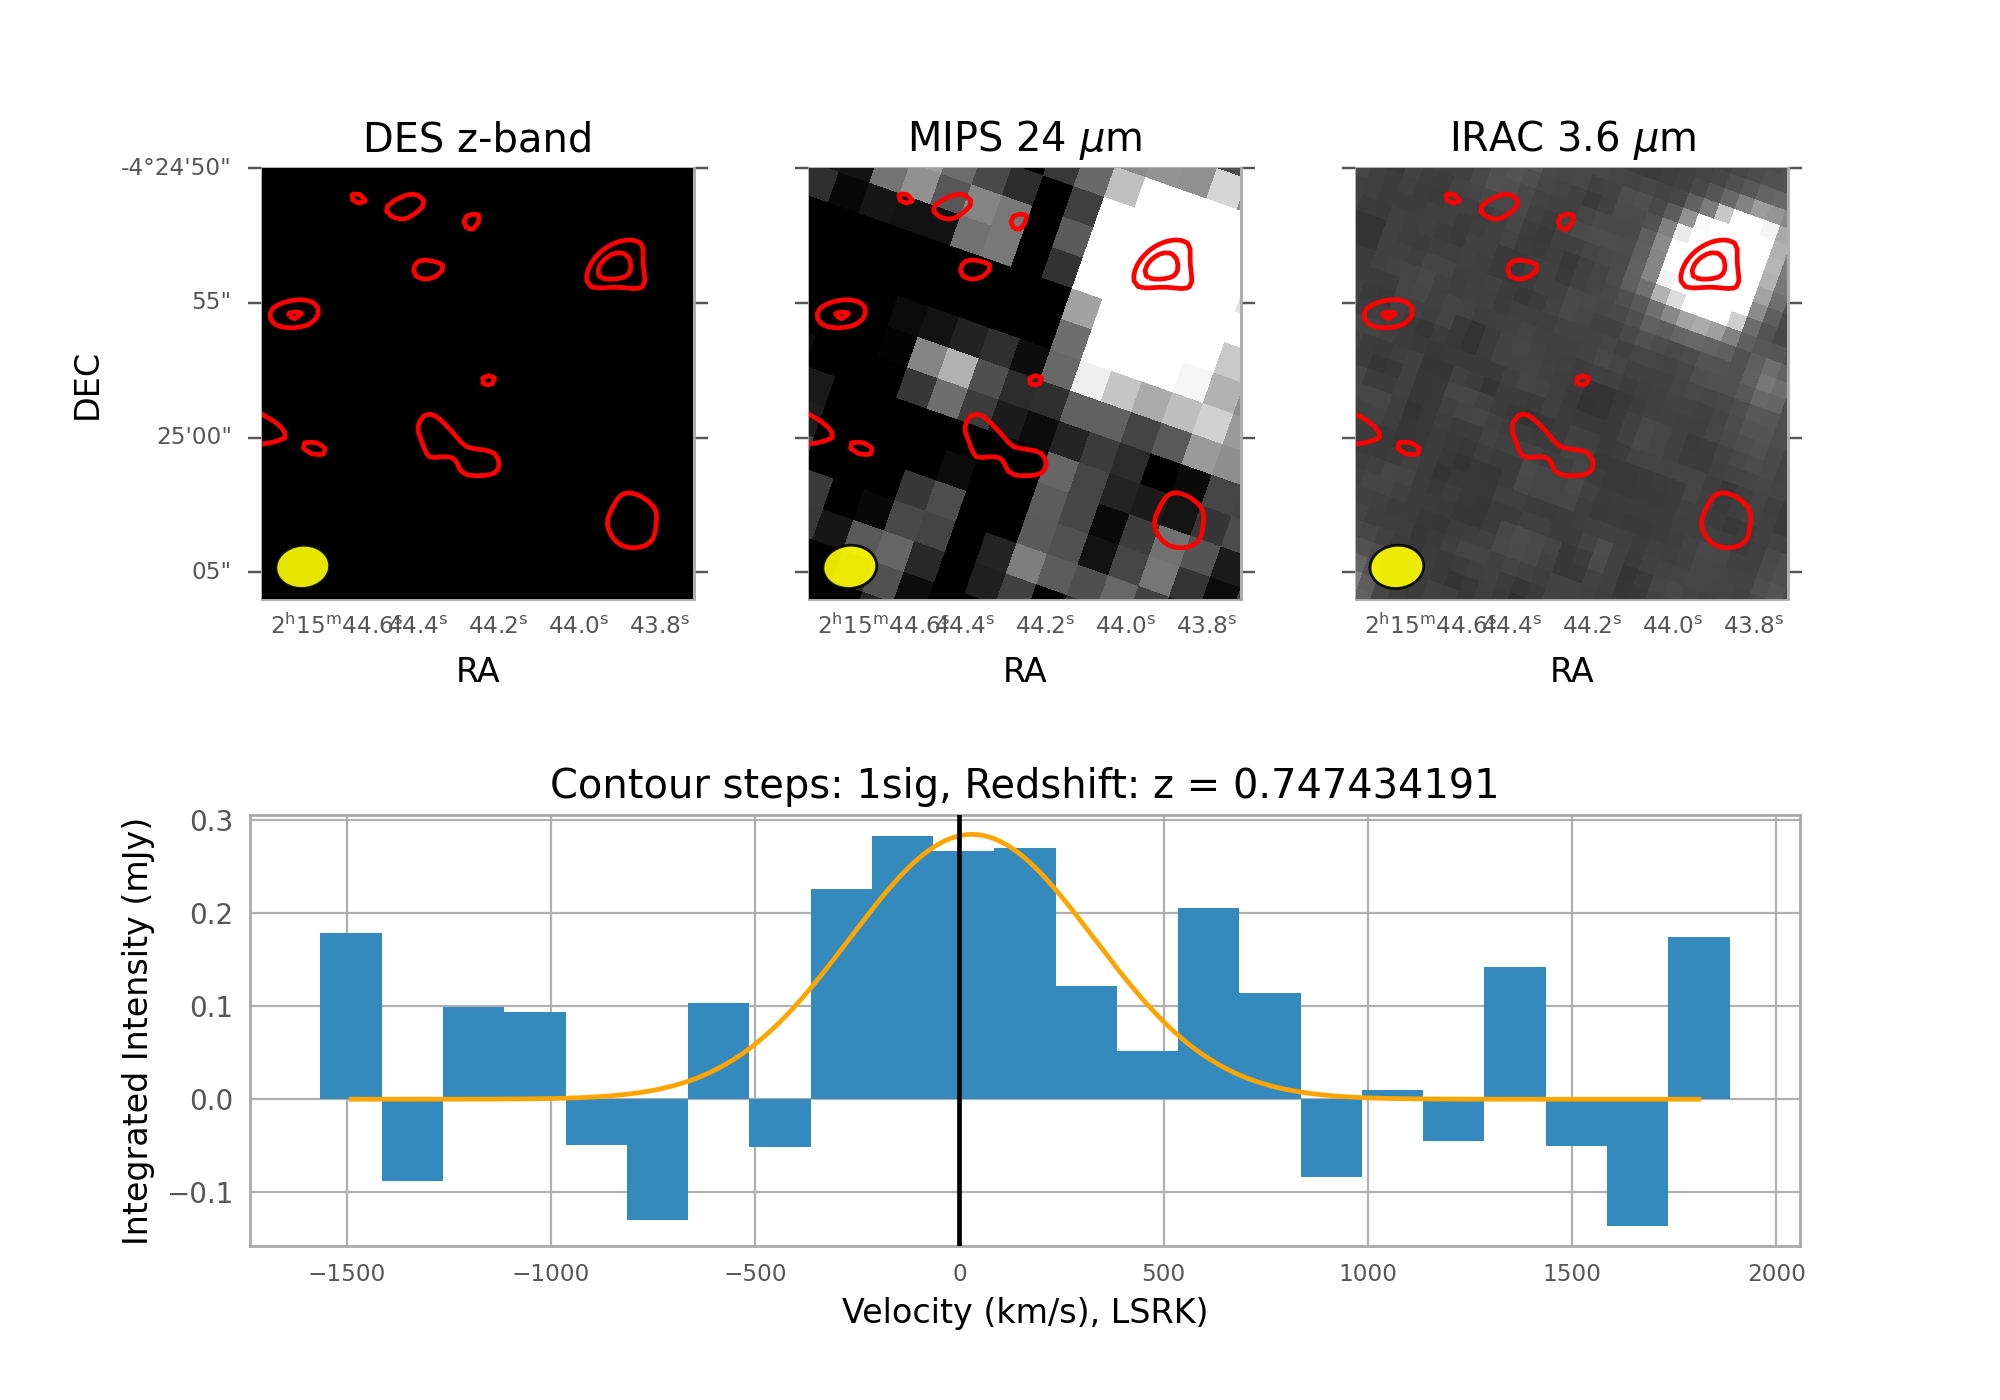

0.10856828519819148 2.1061931998273793


/Users/dee/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/dee/Documents/ALMA/alma_reduction/co_masses.py:279: RuntimeWarning: invalid value encountered in double_scalars
  rmsval = np.sqrt(np.sum(obs[linefree[0]:linefree[1]] ** 2) / len(obs[linefree[0]:linefree[1]]))


In [19]:
datlist = oop.make_stamp_array(files, cutout, 40, z=0.747434191, optext=(1600, 1700), mipsext=(0, 0.2), iracext=(0, 0.4),
                           startstds=2, step=1, p0=[0.003, 100, 100, 0], n_gauss=1, 
                           p02=[0.003, 0.003, -100, 100, 100, 100, 0], centmean=False)#, crtf=regfile)#, whole_image=True)#,#, max_scale=44)
#                            bounds=(np.array([0, -200, 0, -1]), np.array([0.004, 200, 1000, 1])))

0.10856828519819148 2.1061931998273793
[0.21713657 0.32570486 0.43427314 0.54284143 0.65140971 0.759978
 0.86854628 0.97711457 1.08568285 1.19425114 1.30281942 1.41138771
 1.51995599 1.62852428 1.73709256 1.84566085 1.95422913 2.06279742
 2.1713657  2.27993399 2.38850227 2.49707056 2.60563884 2.71420713
 2.82277542 2.9313437  3.03991199 3.14848027 3.25704856 3.36561684
 3.47418513 3.58275341 3.6913217  3.79988998 3.90845827 4.01702655
 4.12559484 4.23416312 4.34273141 4.45129969 4.55986798 4.66843626
 4.77700455 4.88557283 4.99414112 5.1027094  5.21127769 5.31984597]


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


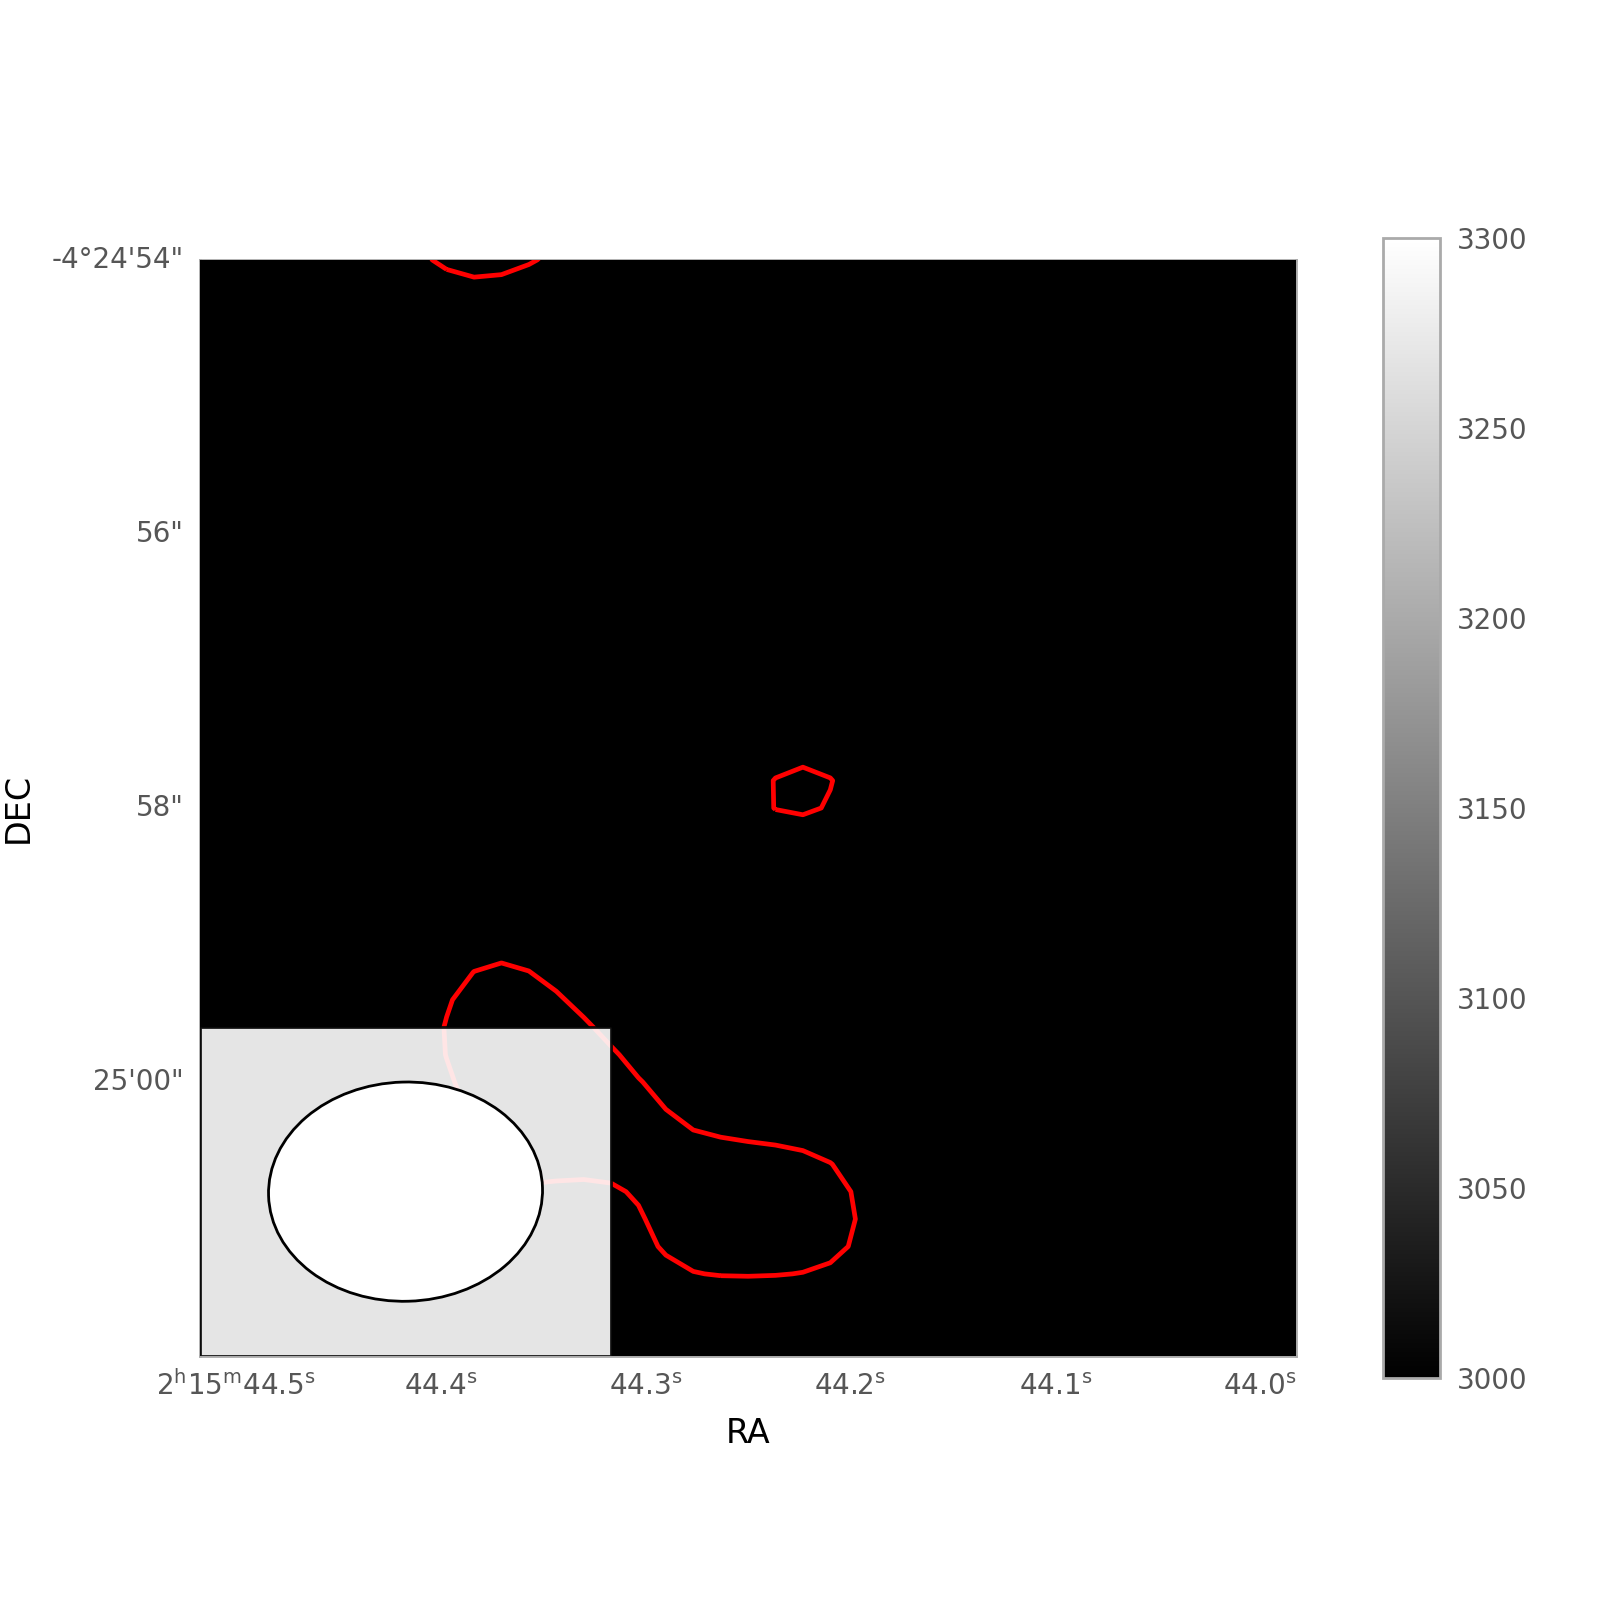

In [20]:
oop.plot_contour_overlay((files[1], files[0]), 3000, 3300, cutout, 20, max_stds=50)

In [25]:
os.chdir('../XMM-3')

In [26]:
xmm3files = (glob.glob('calibrated/*DES*.fits')[0], glob.glob('calibrated/*briggs.peak1.mom0.fits')[0],
             glob.glob('calibrated/*.peak2.mom0.fits')[0])
xmm3files

('calibrated/DESxmm3.fits',
 'calibrated/xmm3rechan_full_briggs.peak1.mom0.fits',
 'calibrated/xmm3rechan_full_briggs.peak2.mom0.fits')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


0.07062028735765075 2.5648322050601493
0.07380241606514494 1.5709291326872559


<IPython.core.display.Javascript object>


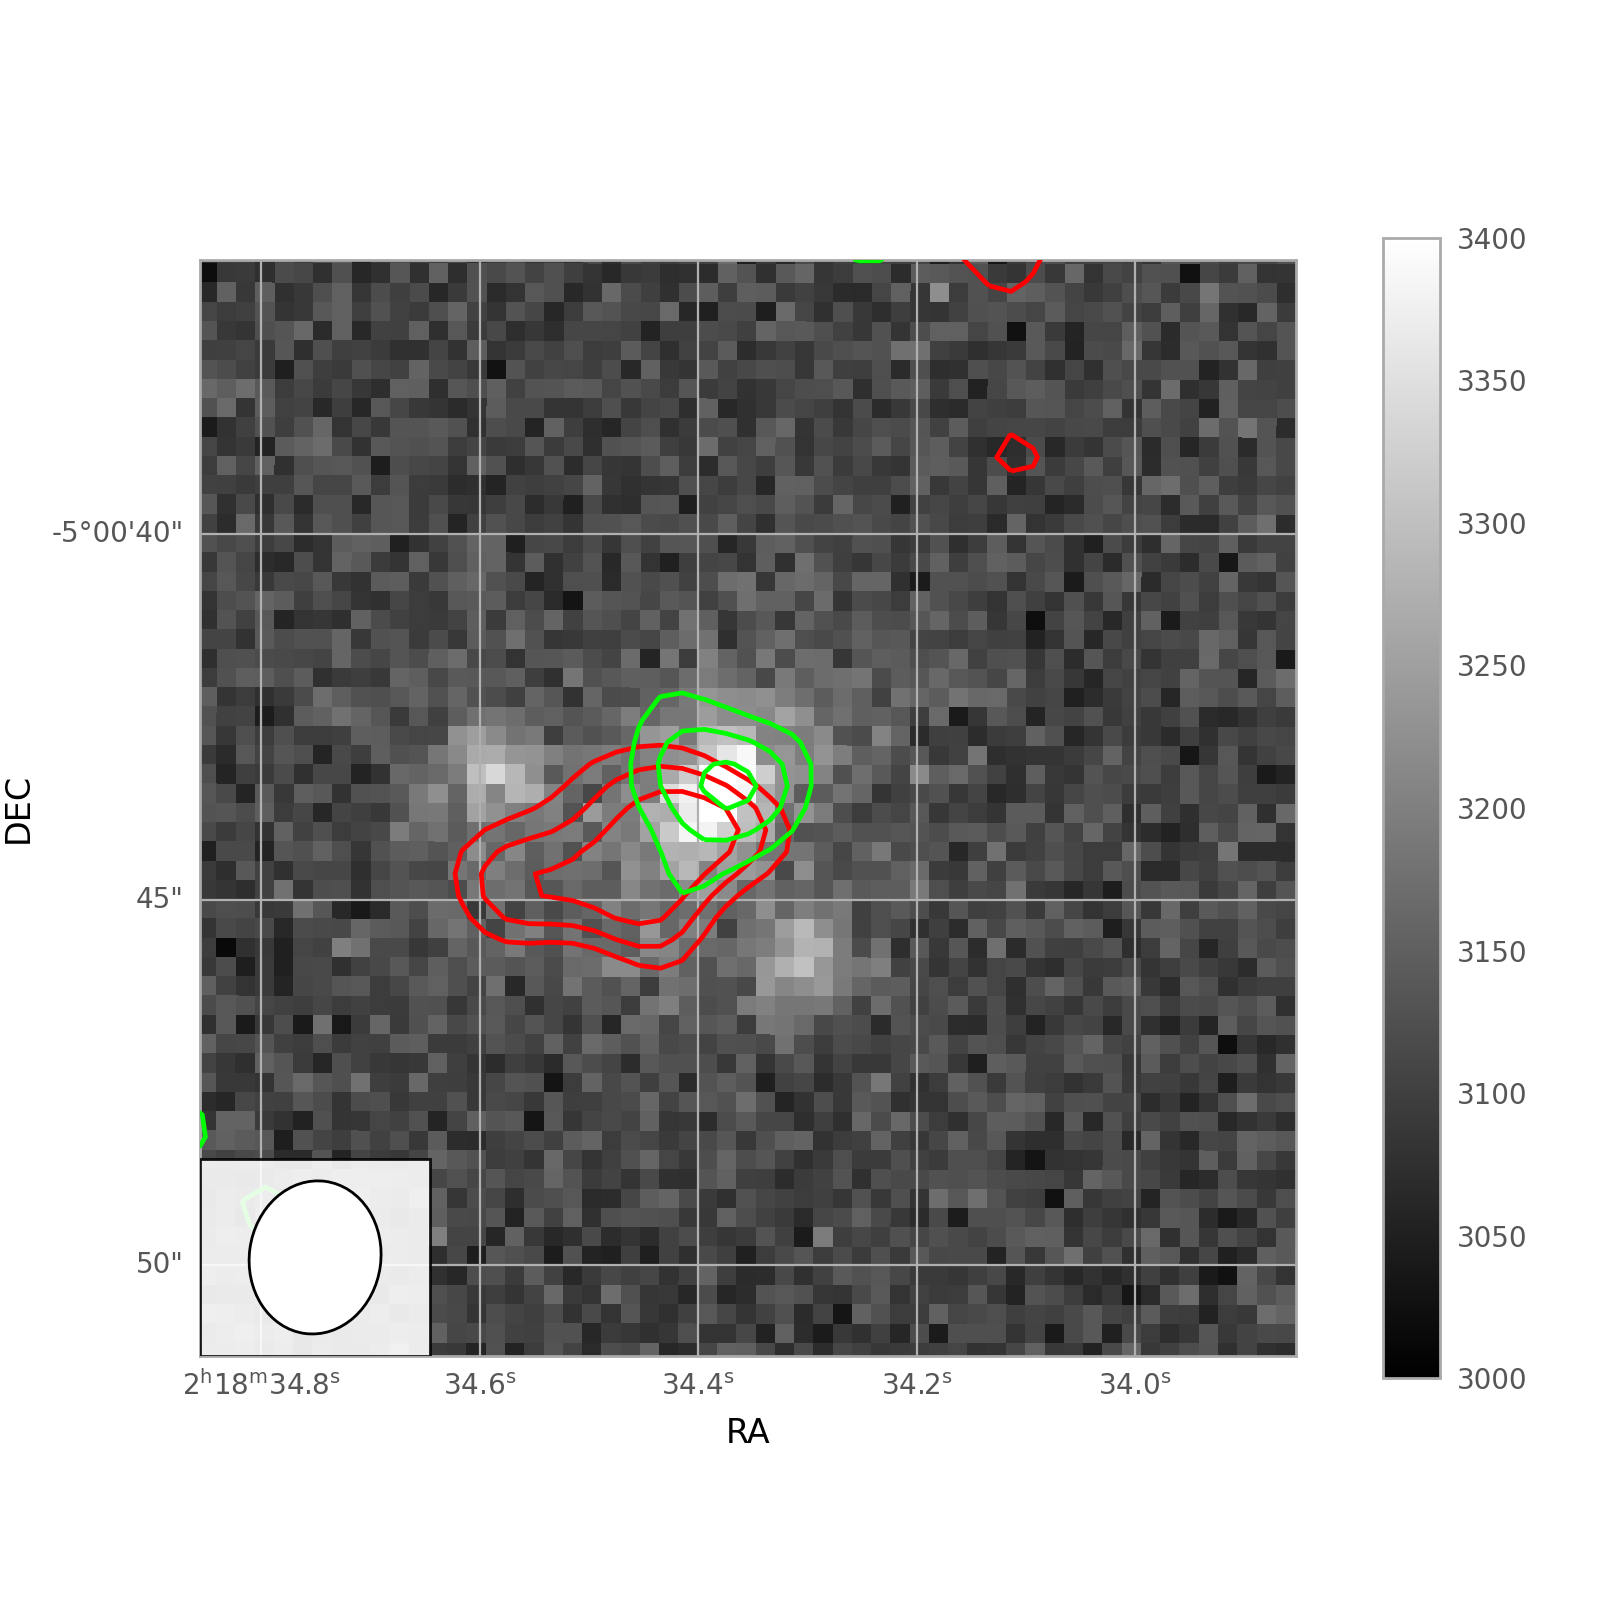

(83.0, 133.0)

In [28]:
# SPECIAL 2-LINE MOMENT PLOT FOR XMM-8
opthdu = fits.open(xmm3files[0])[0]
momhdu1 = fits.open(xmm3files[1])[0]
momhdu2 = fits.open(xmm3files[2])[0]
optmin, optmax = 3000, 3400
max_stds = 50
step = 1
startsig = 2

optwcs = wcs.WCS(opthdu.header)
momwcs = wcs.WCS(momhdu1.header)

momwcs = momwcs.sub(['celestial'])

%matplotlib notebook

momdata1 = momhdu1.data[0, 0, :, :]
momdata1[(np.where(momdata1 == -np.inf))] = 0.
mommax1 = np.nanmax(momdata1)
momstd1, momSN1, xcent1, ycent1, xpeak1, ypeak1 = oop.find_SN_sigma(xmm3files[1], cutout)
levels1 = np.ones((max_stds - startsig) // step) * momstd1
stds1 = np.arange(startsig, max_stds, step=step) * momstd1
levels1 = stds1

momdata2 = momhdu2.data[0, 0, :, :]
momdata2[(np.where(momdata2 == -np.inf))] = 0.
mommax2 = np.nanmax(momdata2)
momstd2, momSN2, xcent2, ycent2, xpeak2, ypeak2 = oop.find_SN_sigma(xmm3files[2], cutout)
levels2 = np.ones((max_stds - startsig) // step) * momstd2
stds2 = np.arange(startsig, max_stds, step=step) * momstd2
levels2 = stds2

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=momwcs)
cs1 = ax.contour(momdata1, colors='red', levels=levels1)
cs2 = ax.contour(momdata2, colors='lime', levels=levels2)

custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='lime', lw=2)]

# ax.legend(custom_lines, ['52574.1 km/s', '52208.3 km/s'])

xlim = ax.get_xlim()
ylim = ax.get_ylim()

opt_transform = ax.get_transform(optwcs)

im = ax.imshow(opthdu.data, cmap=plt.cm.gray, transform=opt_transform, vmin=optmin, vmax=optmax)

cbar = plt.colorbar(im, fraction=0.046, pad=0.07)

# get the semimajor and semiminor axis values from the header
a = (momhdu1.header['BMAJ']*u.deg)
b = (momhdu1.header['BMIN']*u.deg)
theta = momhdu1.header['BPA']


# define skycoord objects for the extent of the axes to change into pix
center = SkyCoord(momhdu1.header['CRVAL1']*u.deg, momhdu1.header['CRVAL2']*u.deg, frame='fk5')
ext = SkyCoord(momhdu1.header['CRVAL1']*u.deg - a, momhdu1.header['CRVAL2']*u.deg + b, frame='fk5')

# change the wcs into native pixels
centerpix = momwcs.world_to_pixel(center)
extpix = momwcs.world_to_pixel(ext)

# center values are the center of the ellipse, the lengths are the differences between center and ext
arad, brad = int(extpix[0] - centerpix[0]), int(extpix[1] - centerpix[1])  



ax.set_xlabel('RA')
ax.set_ylabel('DEC')


beambkg = Rectangle((83, 83), width=arad*1.5, height=brad*1.5, facecolor='w', 
                    edgecolor='k',zorder=10, alpha=0.9)
beam = Ellipse((83 + arad*0.75, 83 + brad*0.75), 
               width=arad, height=brad, angle=theta, facecolor='w', edgecolor='k', zorder=11)

ax.add_patch(beambkg)
ax.add_patch(beam)


ax.set_xlim([83, 133])
ax.set_ylim([83, 133])

In [29]:
def contours_on_mom1(optfile, mom1file, levels, stds, step, startsig, xext, yext):
    
    opthdu = fits.open(optfile)[0]
    momhdu1 = fits.open(mom1file)[0]
    
    optwcs = wcs.WCS(opthdu.header)
    momwcs = wcs.WCS(momhdu1.header)
    
    momwcs = momwcs.sub(['celestial'])

    %matplotlib notebook

    momdata = momhdu1.data[0,0,:,:]
    # momdata[np.where(momdata > 75)] = np.nan
    # momdata[np.where(momdata < -125)] = np.nan

    levels = np.arange(levels[0], levels[1], step=step)

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection=momwcs)

    im = ax.imshow(momdata, cmap=plt.cm.jet, alpha=0.9)

    opt_transform = ax.get_transform(optwcs)

    cs1 = ax.contour(opthdu.data, colors='black', levels=levels, transform=opt_transform, zorder=10)
    # cs2 = ax.contour(momdata2, colors='lime', levels=levels2)

    custom_lines = [Line2D([0], [0], color='red', lw=2),
                    Line2D([0], [0], color='lime', lw=2)]

    # ax.legend(custom_lines, ['52574.1 km/s', '52208.3 km/s'])

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()




    cbar = plt.colorbar(im, fraction=0.046, pad=0.07)
    cbar.ax.set_ylabel('Relative velocity (km/s)')

    # get the semimajor and semiminor axis values from the header
    a = (momhdu1.header['BMAJ']*u.deg)
    b = (momhdu1.header['BMIN']*u.deg)
    theta = (momhdu1.header['BPA'] * u.deg).value + 90
    print(theta)


    # define skycoord objects for the extent of the axes to change into pix
    center = SkyCoord(momhdu1.header['CRVAL1']*u.deg, momhdu1.header['CRVAL2']*u.deg, frame='fk5')
    ext = SkyCoord(momhdu1.header['CRVAL1']*u.deg - a, momhdu1.header['CRVAL2']*u.deg + b, frame='fk5')

    # change the wcs into native pixels
    centerpix = momwcs.world_to_pixel(center)
    extpix = momwcs.world_to_pixel(ext)

    # center values are the center of the ellipse, the lengths are the differences between center and ext
    arad, brad = int(extpix[0] - centerpix[0]), int(extpix[1] - centerpix[1])  



    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')

    xmin, xmax = xext[0], xext[1]
    ymin, ymax = yext[0], yext[1]


    beambkg = Rectangle((xmin, ymin), width=arad*1.5, height=brad*1.5, facecolor='w', 
                        edgecolor='k',zorder=10, alpha=0.9)
    beam = Ellipse((xmin + arad*0.75, ymin + brad*0.75), 
                   width=arad, height=brad, angle=theta, facecolor='w', edgecolor='k', zorder=11)

    ax.add_patch(beambkg)
    ax.add_patch(beam)


    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])

In [30]:
os.chdir('../../CDFS/CDFS-4')

mom1files = (glob.glob('calibrated/*DES*.fits')[0], glob.glob('calibrated/*mom1*.fits')[0])
mom1files

('calibrated/DESopticalCDFS4.fits',
 'calibrated/cdfs4_75kms_rechan_full.mom1.fits')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


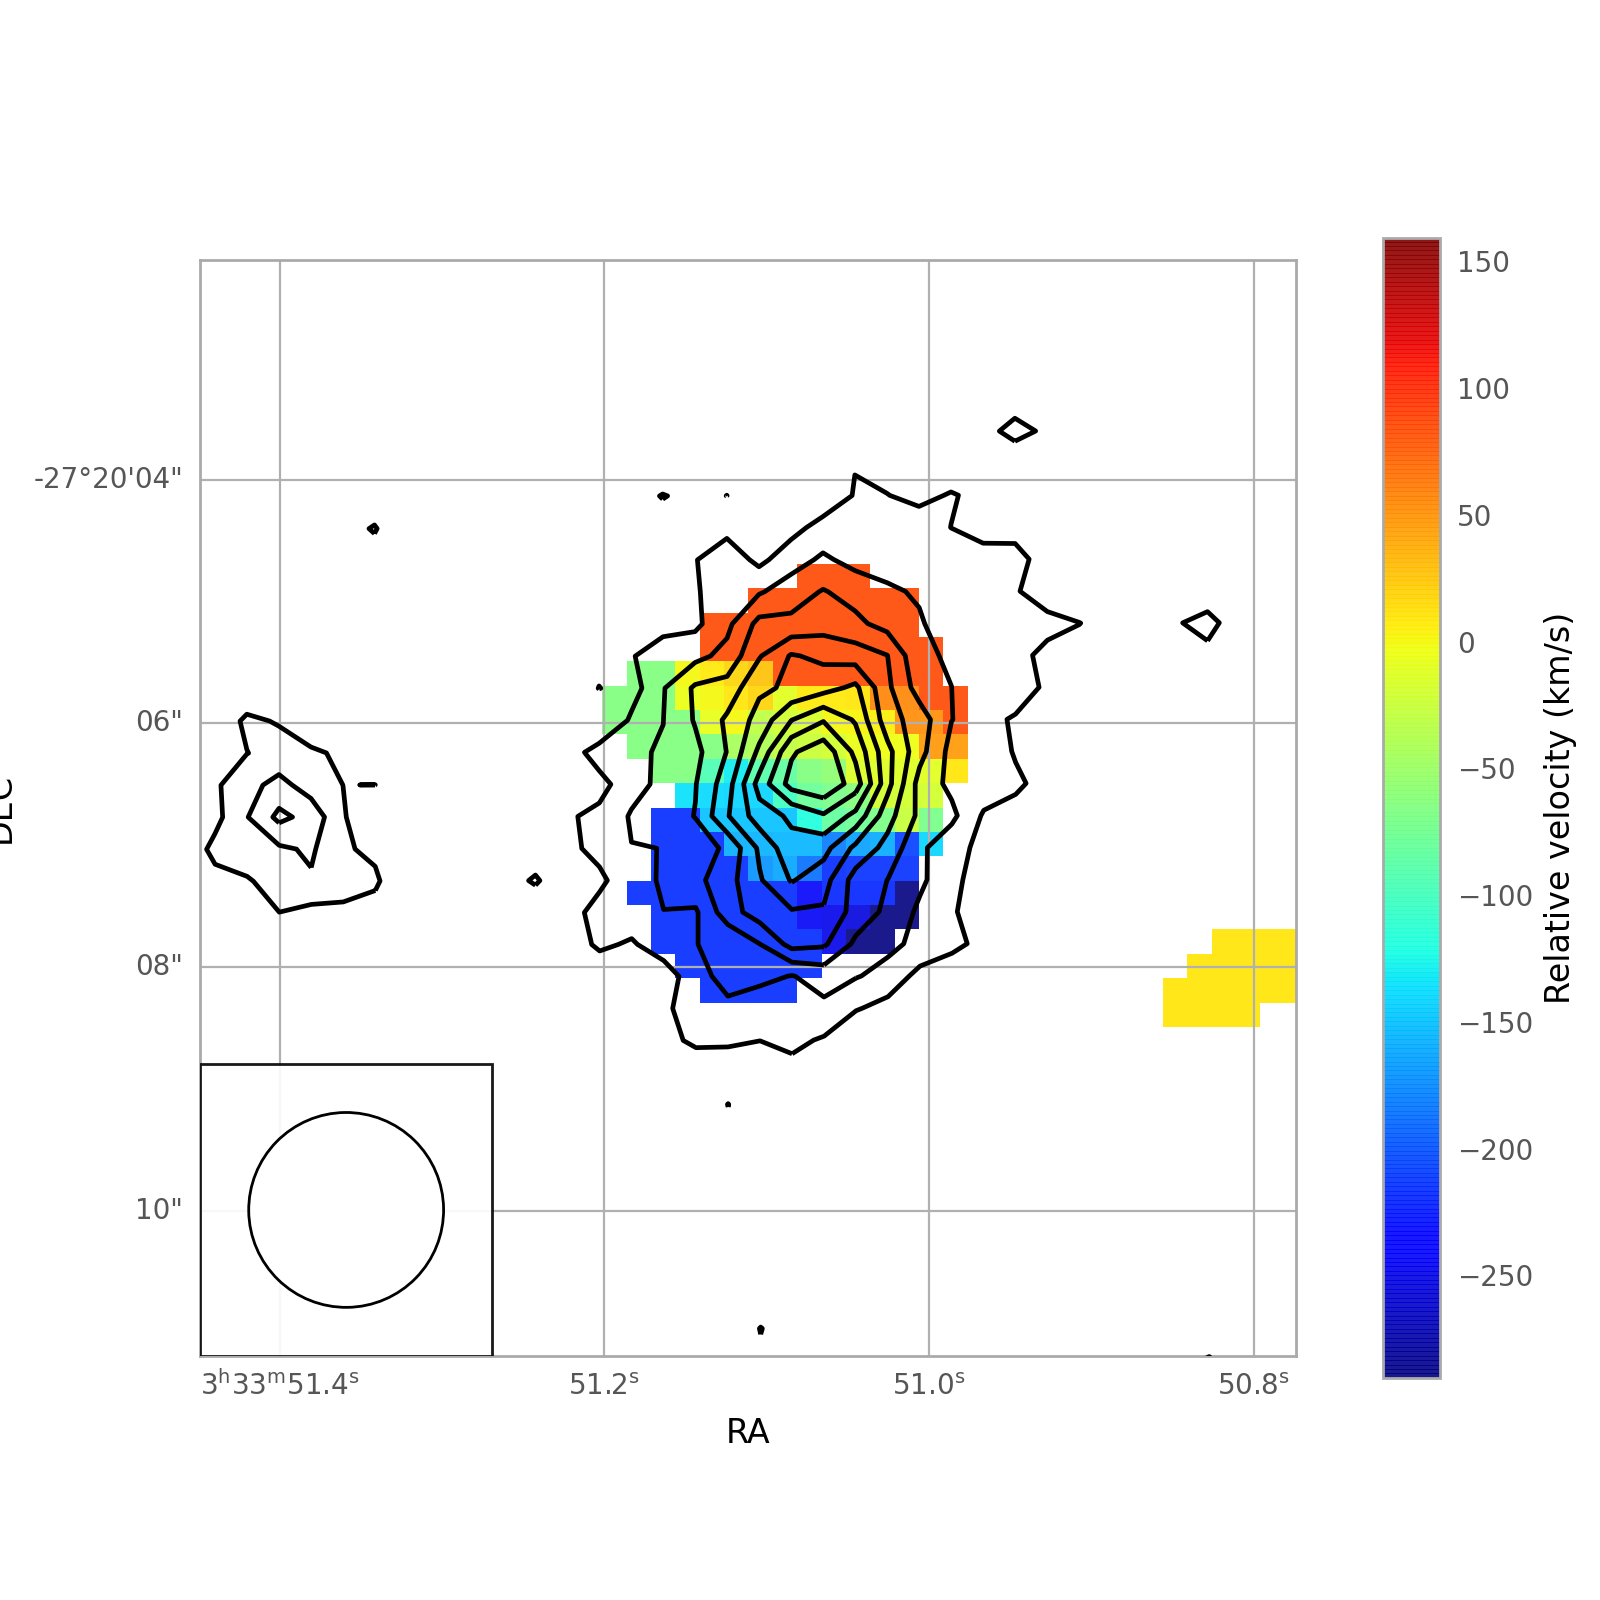

0.7176513671900011


In [31]:
# optfile, mom1file, levels, stds, step, startsig, xext, yext
contours_on_mom1(mom1files[0], mom1files[1], (40, 400), 1, 40, 1, (115,160), (115,160))

# GOOD STAMP ARRAY

In [33]:
def pretty_stamp_array(filelist, mom_cutout, npix, zlist, optext=(0, 80), iracext=(0, 1), delp=None,
                       maxscale=None, max_stds=50, step=2, whole_image=False, startstds=2, p0=[0.3, 67200, 50, 0],
                       centmean=True, p02=None, linefree=(0, 50), n_gauss=None, zvals=(90, 160), SN=None,
                       centline=True, spaxlims=None, max_scale=None, deltap=None, fit=True, crtf=None, ycutout=None,
                       xpeakpass=None, ypeakpass=None, xcentpass=None, ycentpass=None, std=None,
                       bounds=(np.array([-np.inf, -np.inf, -np.inf, -np.inf]),
                               np.array([np.inf, np.inf, np.inf, np.inf]))):
    ''' make an array of postage stamp images for easy analysis of a single souce.
        INPUTS:
            - files: ((momfile1, optfile1, iracfile1, specfile1),
                      (momfile2, optfile2, iracfile2, specfile2),
                      (momfile3, optfile3, iracfile3, specfile3)) list of file pointers
            - mom_cutout: (xmin, xmax) coordinates of a region around the source in the moment 0 file small
                enough that the source can be fit to a 2D gaussian to do statistics with
            - npix: number of moment 0 native pixels on each side of the center of the source to include in stamps
            - z: redshift of the source (to put a reference line down in the spectral profile)
            - optmin, optmax: vmin, vmax for the DES optical colorscale
            - delp: positional uncertainty for ALMA moment 0 (if not none, will plot a cross centered around the
                middle of the source to show by how much the position is uncertain)
            - maxscale: maximum recoverable angular scale for ALMA observations (if not none, will plot a circle
                showing how much of the structure falls into this scale)
            - max_stds: maximum number of S/N sigma to reach with the contours
            - step: spacing between moment 0 contours, in S/N sigma
            - whole_image: plot the entire extent of the moment 0 image, instead of just a cutout
            - startstds: S/N level above RMS at which contours should start
    '''
    
    # define the figure with 9 sets of axes
    fig = plt.figure(constrained_layout=True)
    widths = [1, 1, 2]
    heights = [1, 1, 1]

    spec = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)

    # open all of the files and get their data and wcs
    # files are organized like files[0]: momfile, files[1]: optfile, files[2]: iracfile, files[4]: specfile
    
    for gal in range(len(filelist)):
        
        files = filelist[gal]
        z = zlist[gal]

        WCSlist = []
        datalist = []
        hdulist = []
        for file in files[0:3]:
            hdu = fits.open(file)[0]
            hdulist.append(hdu)
            WCSlist.append(wcs.WCS(hdu.header).sub(['celestial']))
            data = hdu.data
            data[np.where(np.isnan(data))] = 0.
            data[np.where(data == -np.inf)] = 0.
            data[np.where(data == np.inf)] = 0.
            if len(data) == 4:
                data = data[0, 0, :, :]
            datalist.append(data)


        ''' first set of axes: this is the moment 0 overlaid on DES '''
        # get moment 0 statistics to plot S/N contours
        mommax = np.nanmax(datalist[0])
        if not SN:
            momstd, momSN, xcent, ycent, xpeak, ypeak = oop.find_SN_sigma(files[0], mom_cutout)
        else:
            momstd = std
            momSN = SN
            xcent = xcentpass
            ycent = ycentpass
            xpeak = xpeakpass
            ypeak = ypeakpass

        levels = np.ones((max_stds - startstds) // step) * momstd
        stds = np.arange(startstds, max_stds, step=step) * momstd
        levels = stds

        # plot the contours first
        alax = fig.add_subplot(spec[0, gal], projection=WCSlist[0])
        alax.contour(datalist[0][0][0], colors='red', levels=levels, zorder=5)

        #     custom_lines = [Line2D([0],[0], color='red', lw=2)]
        #     alax.legend(custom_lines, ['{} sigma steps'.format(step)])

        xlim = alax.get_xlim()
        ylim = alax.get_ylim()

        # WCS transform to line the optical image up
        opt_transform = alax.get_transform(WCSlist[1])

        # plot the optical
        im = alax.imshow(datalist[1], cmap=plt.cm.gray, transform=opt_transform, vmin=optext[0], vmax=optext[1], zorder=1)

        ''' Show the beam'''
        # get the semimajor and semiminor axis values from the header
        a = (hdulist[0].header['BMAJ'] * u.deg)
        b = (hdulist[0].header['BMIN'] * u.deg)
        theta = (hdulist[0].header['BPA'] * u.deg).value + 90

        # define skycoord objects for the extent of the axes to change into pix
        center = SkyCoord(hdulist[0].header['CRVAL1'] * u.deg, hdulist[0].header['CRVAL2'] * u.deg, frame='fk5')
        ext = SkyCoord(hdulist[0].header['CRVAL1'] * u.deg - a, hdulist[0].header['CRVAL2'] * u.deg + b, frame='fk5')

        # change the wcs into native pixels
        centerpix = WCSlist[0].world_to_pixel(center)
        extpix = WCSlist[0].world_to_pixel(ext)

        # center values are the center of the ellipse, the lengths are the differences between center and ext
        arad, brad = int(extpix[0] - centerpix[0]), int(extpix[1] - centerpix[1])

        alax.set_xlabel('RA')
        alax.set_ylabel('DEC')

        if whole_image == True:
            alax.set_xlim(xlim)
            alax.set_ylim(ylim)

            beambkg = Rectangle((xlim[0], ylim[0]), width=arad * 1.5, height=brad * 1.5, facecolor='w',
                                edgecolor='k', zorder=10, alpha=0.9)
            beam = Ellipse((xlim[0] + arad * 0.75, ylim[0] + brad * 0.75), alpha=0.9,
                           width=arad, height=brad, angle=theta, facecolor='yellow', edgecolor='k', zorder=11)

        else:
            xlims = alax.set_xlim([int(xcent) - npix, int(xcent) + npix])
            ylims = alax.set_ylim([int(ycent) - npix, int(ycent) + npix])

            beambkg = Rectangle((xlims[0], ylims[0]), width=arad * 1.5, height=brad * 1.5, facecolor='w',
                                edgecolor='k', zorder=10, alpha=0.9)
            beam = Ellipse((xlims[0] + arad * 0.75, ylims[0] + brad * 0.75), alpha=0.9,
                           width=arad, height=brad, angle=theta, facecolor='yellow', edgecolor='k', zorder=11)

        #     alax.add_patch(beambkg)
        alax.add_patch(beam)
        alax.set_title('DES z-band')
        alax.tick_params(
            axis='y',
            which='both',
            left='on',
            right='off',
            direction='out',
            labelleft=True,
            length=5,
            labelsize='small'
        )
        alax.tick_params(
            axis='x',
            labelsize='small'
        )

        if max_scale is not None:
            arcsecperpix = np.abs((hdulist[0].header['CDELT1'] * u.deg).to(u.arcsec)).value
            max_scale = max_scale / arcsecperpix
            mcirc = Ellipse((xcent, ycent), width=max_scale, height=max_scale,
                            facecolor='green', edgecolor='green', zorder=10, alpha=0.3)
            print("maxscale")
            print(mcirc)
            alax.add_patch(mcirc)

        if deltap is not None:
            arcsecperpix = np.abs((hdulist[0].header['CDELT1'] * u.deg).to(u.arcsec)).value
            deltap = deltap / arcsecperpix
            horline = Line2D([xpeak - deltap, xpeak + deltap], [ypeak, ypeak], color='orange', zorder=10)
            vertline = Line2D([xpeak, xpeak], [ypeak - deltap, ypeak + deltap], color='orange', zorder=10)
            alax.add_line(horline)
            alax.add_line(vertline)

        if crtf:
            ''' show the region over which the spectral profile was taken'''
            with open(crtf, 'r') as file:
                txt = file.read().split()

                xcent = '0'
                for s in txt[1]:
                    if (s.isdigit() or (s == '.')):
                        xcent += s
                xcent = float(xcent[1:])

                ycent = '0'
                for s in txt[2]:
                    if (s.isdigit() or (s == '.')):
                        ycent += s
                ycent = float(ycent[1:])

                lena = '0'
                for s in txt[3]:
                    if (s.isdigit() or (s == '.')):
                        lena += s
                lena = float(lena[1:]) * 2

                lenb = '0'
                for s in txt[4]:
                    if (s.isdigit() or (s == '.')):
                        lenb += s
                lenb = float(lenb[1:]) * 2

                regtheta = '0'
                for s in txt[5]:
                    if (s.isdigit() or (s == '.')):
                        regtheta += s
                regtheta = float(regtheta[1:]) + 90
            # end with open(crtf) as file

            beamreg = Ellipse((xcent, ycent), width=lena, height=lenb, angle=regtheta, alpha=0.3,
                              facecolor='orange', zorder=4, edgecolor='orange')
            print("beamreg")
            print(beamreg)
            alax.add_patch(beamreg)
        # end if crtf

        

        ''' third set of axes: IRAC imaging '''
        irax = fig.add_subplot(spec[1, gal], projection=WCSlist[0])

        # tranformation to line the IRAC axes up
        irac_transform = irax.get_transform(WCSlist[3])

        irax.imshow(datalist[3], cmap=plt.cm.gray, vmin=iracext[0], vmax=iracext[1], zorder=1, transform=irac_transform)
        irax.contour(datalist[0][0][0], colors='red', levels=levels, zorder=5)

        if whole_image == True:
            irax.set_xlim(xlim)
            irax.set_ylim(ylim)

            beambkg = Rectangle((xlim[0], ylim[0]), width=arad * 1.5, height=brad * 1.5, facecolor='w',
                                edgecolor='k', zorder=10, alpha=0.9)
            beam = Ellipse((xlim[0] + arad * 0.75, ylim[0] + brad * 0.75), alpha=0.9,
                           width=arad, height=brad, angle=theta, facecolor='yellow', edgecolor='k', zorder=11)

        else:
            xlims = irax.set_xlim([int(xcent) - npix, int(xcent) + npix])
            ylims = irax.set_ylim([int(ycent) - npix, int(ycent) + npix])

            beambkg = Rectangle((xlims[0], ylims[0]), width=arad * 1.5, height=brad * 1.5, facecolor='w',
                                edgecolor='k', zorder=10, alpha=0.9)
            beam = Ellipse((xlims[0] + arad * 0.75, ylims[0] + brad * 0.75), alpha=0.9,
                           width=arad, height=brad, angle=theta, facecolor='yellow', edgecolor='k', zorder=11)

        #     alax.add_patch(beambkg)
        irax.add_patch(beam)
        irax.set_xlabel('RA')
        irax.tick_params(
            axis='y',
            which='both',
            left='on',
            right='off',
            direction='out',
            labelleft=False,
            labelright=False,
            length=5
        )
        irax.tick_params(
            axis='x',
            labelsize='small'
        )
        irax.set_title(r'IRAC $3.6\ \mu\mathrm{m}$')

        if max_scale is not None:
            mcirc = Ellipse([xpeak, ypeak], width=max_scale, height=max_scale,
                            facecolor='green', edgecolor='k', zorder=3, alpha=0.3)
            irax.add_patch(mcirc)

        if deltap is not None:
            #         irax.scatter(xpeak, ypeak, color='orange', zorder=20)
            horline = Line2D([xpeak - deltap, xpeak + deltap], [ypeak, ypeak], color='orange', zorder=10)
            vertline = Line2D([xpeak, xpeak], [ypeak - deltap, ypeak + deltap], color='orange', zorder=10)
            irax.add_line(horline)
            irax.add_line(vertline)

        ''' Spectral profile axes '''
        # load in the spectral profile from the file
        specprof = np.genfromtxt(files[4])
        vel, flux = specprof[:, 0], specprof[:, 1]

        zmin, zmax = zvals[0], zvals[1]

        # xarray to fit
        x = np.linspace(np.min(vel), np.max(vel), num=500)

        spax = fig.add_subplot(spec[2, gal])

        # plot the intensity data to make sure the fit worked
        spax.bar(vel, flux * 1e3, width=np.abs(vel[1] - vel[0]))
        spax.set_xlabel('Velocity (km/s), LSRK)')
        spax.set_ylabel('Integrated Intensity (mJy)')
        spax.set_title('CO (2-1) Spectral Profile')

        if fit == True:
            # adjust the guess fit parameters to match the data
            if centmean:
                meanval = np.mean(x)
                p0[1] = meanval
            if not p02:
                # if no fit parameters are passed, guess based off the fit parameters for one gaussian
                p02 = [p0[0], p0[0], p0[1] - 50, p0[1] + 50, p0[2], p0[2], 0]

            # fit to a gaussian
            opt1, cov1 = curve_fit(gaussian, vel, flux, p0=p0, bounds=bounds)
            # fit to two gaussians
            opt2, cov2 = curve_fit(twogaussian, vel, flux, p0=p02)

            # find the reduced chi-squared value for each fit
            rms1 = co.rmsfunc(flux[zmin:zmax], linefree=linefree)
            rms2 = co.rmsfunc(flux[zmin:zmax], linefree=linefree)

            chi1 = co.chi(flux[zmin:zmax], gaussian(vel[zmin:zmax], *opt1), 4, linefree=linefree)
            chi2 = co.chi(flux[zmin:zmax], twogaussian(vel[zmin:zmax], *opt2), 8, linefree=linefree)

            if not n_gauss:
                if chi1 < chi2:
                    use_twog = False
                    rms = rms1
                    opt = opt1
                elif chi1 > chi2:
                    use_twog = True
                    rms = rms2
                    opt = opt2
            else:
                if n_gauss == 1:
                    use_twog = False
                    rms = rms1
                    opt = opt1
                elif n_gauss == 2:
                    use_twog = True
                    rms = rms2
                    opt = opt2
                else:
                    print("Warning: Calling for a number other than 1 or 2 Gaussians")
                    return

            if use_twog == False:
                spax.plot(x, gaussian(x, *opt1) * 1e3, color='orange')
            else:
                spax.plot(x, twogaussian(x, *opt2) * 1e3, color='orange')

        freq_to_vel = u.doppler_radio(230.528 * u.GHz)
        if centline:
            centfreq = 230.538 * u.GHz / (1 + z)
            centvel = centfreq.to(u.km / u.s, equivalencies=freq_to_vel)

            spax.axvline(x=0, zorder=20, color='k')

        if spaxlims:
            spax.set_xlim(spaxlims)

        spax.tick_params(
            axis='x',
            labelsize='small'
        )
        spax.yaxis.set_label_position('left')
        spax.tick_params(
            axis='y',
            left='on',
            right='off',
            labelright=False,
            labelleft=True
        )

        spax.set_title('Contour steps: {}sig, Redshift: z = {}'.format(step, z))
        
    # end for files in filelist

    return datalist

In [34]:
# assemble files to pass to the stamp_array function - trying first with CDFS-1, ES1-2, and XMM-2
# files[0]: momfile, files[1]: optfile, files[3]: iracfile, files[4]: specfile

os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S')


files1 = (glob.glob('CDFS/CDFS-1/calibrated/*rechan*mom0*.fits')[0], 
          glob.glob('CDFS/CDFS-1/calibrated/*DES*.fits')[0], 
          glob.glob('CDFS/CDFS-1/other_imaging/*_I1_*.fits')[0],
          glob.glob('CDFS/CDFS-1/calibrated/*specprof.txt')[-3])
files1

('CDFS/CDFS-1/calibrated/cdfs1rechan.fromspec.mom0.fits',
 'CDFS/CDFS-1/calibrated/DESopticalCDFS1.fits',
 'CDFS/CDFS-1/other_imaging/0001_52.26829000_-28.79808000_swire_CDFS_I1_tile_3_2_v4_mosaic.fits',
 'CDFS/CDFS-1/calibrated/cdfs1rechan.mom0region.specprof.txt')

In [35]:
files2 = (glob.glob('ES1/ES1-3/calibrated/*rechan*mom0*.fits')[0], 
          glob.glob('ES1/ES1-3/calibrated/*DES*.fits')[0], 
          glob.glob('ES1/ES1-3/other_imaging/*_I1_*.fits')[0],
          glob.glob('ES1/ES1-3/calibrated/*specprof.txt')[-1])
files2

('ES1/ES1-3/calibrated/es13rechan.fromspec.mom0.fits',
 'ES1/ES1-3/calibrated/DESopticalES13.fits',
 'ES1/ES1-3/other_imaging/0001_7.03042000_-43.34480000_swire_ES1_I1_tile_3_4_v4_mosaic.fits',
 'ES1/ES1-3/calibrated/es13_75kms_rechan_full.mom0region.specprof.txt')

In [36]:
files3 = (glob.glob('XMM/XMM-2/calibrated/*rechan*mom0*.fits')[0], 
          glob.glob('XMM/XMM-2/calibrated/*DES*.fits')[0], 
          glob.glob('XMM/XMM-2/other_imaging/*_I1_*.fits')[0],
          glob.glob('XMM/XMM-2/calibrated/*specprof.txt')[2])
files3

('XMM/XMM-2/calibrated/xmm2_100kms_rechan.mom0.fits',
 'XMM/XMM-2/calibrated/DESxmm2.fits',
 'XMM/XMM-2/other_imaging/0001_33.93287000_-4.41511000_swire_XMM_I1_tile_4_3_v4_mosaic.fits',
 'XMM/XMM-2/calibrated/xmm2_150kms_rechan_full.mom0region.specprof.txt')

In [37]:
masterlist = (files1, files2, files3)
zlist = (0.21505, 0.8068, 0.45659)
momcutoutlist = ((70, 120), (80,100), (90, 115))
max_stds = 50
startstds = 2
steplist = (5, 2, 0.5)
optextlist = ((1300, 1700), (2, 100), (2, 200))
narcsec = 10
iracextlist = ((0, 1), (0, 0.6), (0, 1))
galnamelist = ['CDFS-CO1', 'ES1-CO3', 'XMM-C02']

p0=[0.3, 67200, 50, 0]
centmean=True
p02=None
linefree=(0, 50)
n_gausslist = (2, 2, 1)
zvals=((90, 160), (90, 160), (90, 160))
centline=True
fit=True
bounds=(np.array([-np.inf, -np.inf, -np.inf, -np.inf]),
        np.array([np.inf, np.inf, np.inf, np.inf]))

p0list = ([30, 20, -250, 250, 100, 100, 0], [4, 3, -300, 100, 200, 100, 0], [1.5, -150, 100, 0])

zminlist = ([-500, -600, -500])
zmaxlist = ([500, 500, 500])
# xpeakpass=None, ypeakpass=None, xcentpass=None, ycentpass=None, std=None

<IPython.core.display.Javascript object>


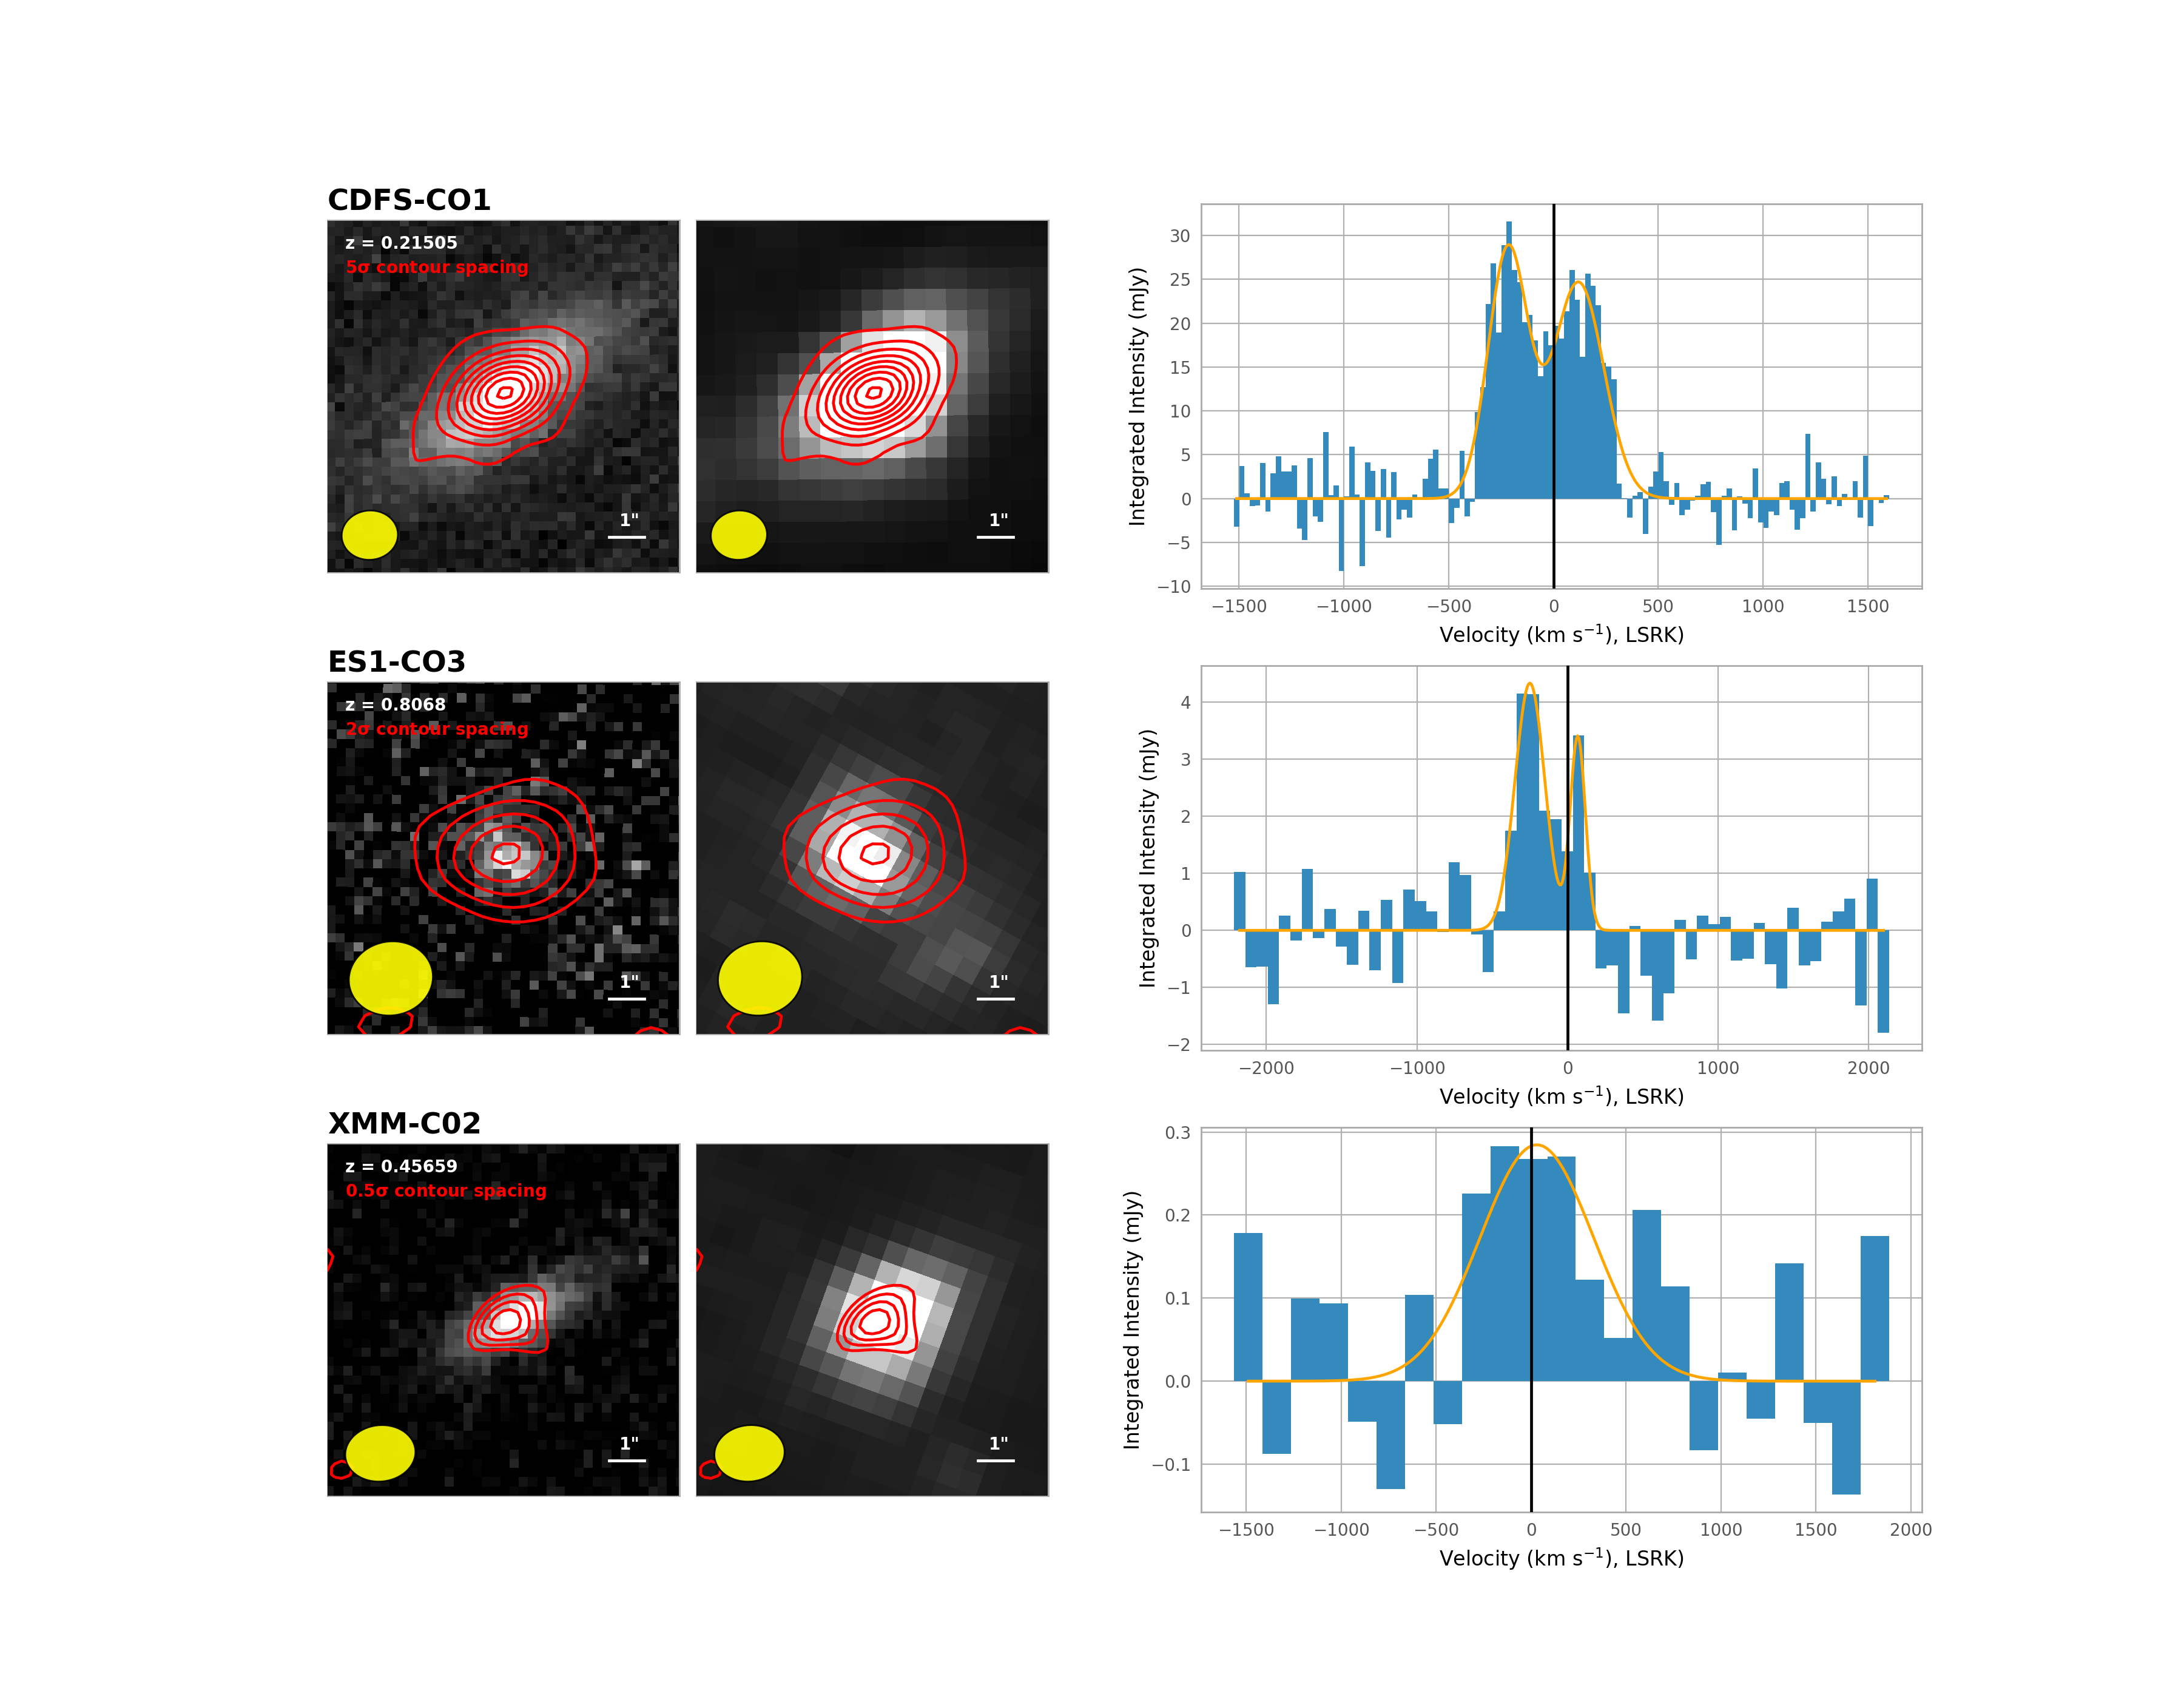

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


0.24088966761550848 42.92591451192618


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


0.11528535751197791 10.396823240750013


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


0.10362610159367058 3.871344514042132


/Users/dee/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/dee/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/dee/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [38]:
# not using a function to do this - just do it all in the cell
# define the figure with 9 sets of axes
fig = plt.figure(figsize=(18, 14))

imspec = fig.add_gridspec(ncols=2, nrows=3, left=0.15, right=0.48, wspace=0.05, hspace=0.2)

for gal in range(3):
    # read in all the data for the first galaxy
    files = masterlist[gal]
    z = zlist[gal]
    mom_cutout = momcutoutlist[gal]
    step = steplist[gal]
    optext = optextlist[gal]
    iracext = iracextlist[gal]
    n_gauss = n_gausslist[gal]
    zmin = zminlist[gal]
    zmax = zmaxlist[gal]
    galname = galnamelist[gal]
    
    WCSlist = []
    datalist = []
    hdulist = []
    for file in files[0:3]:
        hdu = fits.open(file)[0]
        hdulist.append(hdu)
        WCSlist.append(wcs.WCS(hdu.header).sub(['celestial']))
        data = hdu.data
        data[np.where(np.isnan(data))] = 0.
        data[np.where(data == -np.inf)] = 0.
        data[np.where(data == np.inf)] = 0.
        if len(data) == 4:
            data = data[0, 0, :, :]
        datalist.append(data)
        
    momhdr = hdulist[0]
    pixtodeg = np.abs(momhdr.header['CDELT1'])*u.deg
    pixtoarcsec = pixtodeg.to(u.arcsec)
    
    npixgood = (narcsec / pixtoarcsec / 2).value
        
    ''' first set of axes: this is the moment 0 overlaid on DES '''
    # get moment 0 statistics to plot S/N contours
    mommax = np.nanmax(datalist[0])

    momstd, momSN, xcent, ycent, xpeak, ypeak = oop.find_SN_sigma(files[0], mom_cutout)
    
#     if gal == 0:
#         xpeak -= 5
#         ypeak -= 3
#     if gal == 1:
#         xpeak -= 4
#         ypeak -= 3
    
    '''if you want to put in a custom snr, change it here'''

    levels = np.ones(int((max_stds - startstds) // step)) * momstd
    stds = np.arange(startstds, max_stds, step=step) * momstd
    levels = stds

    # plot the contours first
    alax = fig.add_subplot(imspec[gal, 0], projection=WCSlist[0])
    alax.contour(datalist[0][0][0], colors='red', levels=levels, zorder=5)

    #     custom_lines = [Line2D([0],[0], color='red', lw=2)]
    #     alax.legend(custom_lines, ['{} sigma steps'.format(step)])

    xlim = alax.get_xlim()
    ylim = alax.get_ylim()

    # WCS transform to line the optical image up
    opt_transform = alax.get_transform(WCSlist[1])

    # plot the optical
    im = alax.imshow(datalist[1], cmap=plt.cm.gray, transform=opt_transform, vmin=optext[0], vmax=optext[1], zorder=1)

    ''' Show the beam'''
    # get the semimajor and semiminor axis values from the header
    a = (hdulist[0].header['BMAJ'] * u.deg)
    b = (hdulist[0].header['BMIN'] * u.deg)
    theta = (hdulist[0].header['BPA'] * u.deg).value + 90
    
    # change the arcsecond extent of the axes into degrees (and divide by 2) for easy conversion to pix
    ndeg = (narcsec*u.arcsec).to(u.deg) / 2

    # define skycoord objects for the extent of the axes to change into pix
    center = SkyCoord(hdulist[0].header['CRVAL1'] * u.deg, hdulist[0].header['CRVAL2'] * u.deg, frame='fk5')
    ext = SkyCoord(hdulist[0].header['CRVAL1'] * u.deg - a, hdulist[0].header['CRVAL2'] * u.deg + b, frame='fk5')
    axext = SkyCoord(hdulist[0].header['CRVAL1'] * u.deg - ndeg, 
                     hdulist[0].header['CRVAL2'] * u.deg + ndeg, frame='fk5')

    # change the wcs into native pixels
    centerpix = WCSlist[0].world_to_pixel(center)
    extpix = WCSlist[0].world_to_pixel(ext)
    axextpix = WCSlist[0].world_to_pixel(axext)

    # center values are the center of the ellipse, the lengths are the differences between center and ext
    arad, brad = int(extpix[0] - centerpix[0]), int(extpix[1] - centerpix[1])
    axxrad, axyrad = int(axextpix[0] - centerpix[0]), int(axextpix[1] - centerpix[1])

    alax.set_xlabel('DES z-band')
    alax.set_xticks([])
    alax.set_ylabel('DEC')
    
    xmin, xmax = int(xpeak) - npixgood, int(xpeak) + npixgood
    ymin, ymax = int(ypeak) - npixgood, int(ypeak) + npixgood 

    xlims = alax.set_xlim([xmin, xmax])
    ylims = alax.set_ylim([ymin, ymax])

    beambkg = Rectangle((xlims[0], ylims[0]), width=arad * 1.5, height=brad * 1.5, facecolor='w',
                        edgecolor='k', zorder=10, alpha=0.9)
    beam = Ellipse((xlims[0] + arad * 0.75, ylims[0] + brad * 0.75), alpha=0.9,
                   width=arad, height=brad, angle=theta, facecolor='yellow', edgecolor='k', zorder=11)

    alax.add_patch(beam)
#     alax.set_title('DES z-band')
    alax.tick_params(
        axis='y',
        which='both',
        left='off',
        right='off',
        labelleft=False,
        labelright=False,
        length=0,
        labelsize='small'
    )
    alax.tick_params(
        axis='x',
        which='both',
        top='off',
        bottom='off',
        labeltop=False,
        labelbottom=False,
        length=0
    )
    
    """labels and annotations"""
    
    alax.set_title(galname, loc='left', fontweight='bold', fontsize='xx-large')
    
    scalebar = Line2D([xmax - 1/pixtoarcsec.value, xmax - 2/pixtoarcsec.value],
                      [ymin + 1/pixtoarcsec.value, ymin + 1/pixtoarcsec.value], color='white', zorder=10)
    alax.add_line(scalebar)
    alax.annotate('1"', xy = (xmax - 1.7/pixtoarcsec.value, ymin + 1.3/pixtoarcsec.value), color='white',
                  fontweight='bold')
    
#     alax.annotate('DES z-band', xy=(xmin + 1/pixtoarcsec.value/2, ymax - 1/pixtoarcsec.value), color='white',
#                   fontweight='bold')
    
    alax.annotate('z = {}'.format(z), xy=(xmin + 1/pixtoarcsec.value/2, ymax - 0.8/pixtoarcsec.value),
                  color='white', fontweight='bold')    
    if gal==0:
        alax.annotate(r'$\mathbf{5}\mathbf{\sigma}$ contour spacing', 
                      xy=(xmin + 1/pixtoarcsec.value/2, ymax - 1.5/pixtoarcsec.value),
                      color='red', fontweight='bold')
    elif gal==1:
        alax.annotate(r'$\mathbf{2}\mathbf{\sigma}$ contour spacing', 
                      xy=(xmin + 1/pixtoarcsec.value/2, ymax - 1.5/pixtoarcsec.value),
                      color='red', fontweight='bold')
    else:
        alax.annotate(r'$\mathbf{0.5}\mathbf{\sigma}$ contour spacing', 
                      xy=(xmin + 1/pixtoarcsec.value/2, ymax - 1.5/pixtoarcsec.value),
                      color='red', fontweight='bold')
    
    
    
    ''' second set of axes: IRAC imaging '''
    irax = fig.add_subplot(imspec[gal, 1], projection=WCSlist[0])

    # tranformation to line the IRAC axes up
    irac_transform = irax.get_transform(WCSlist[2])

    irax.imshow(datalist[2], cmap=plt.cm.gray, vmin=iracext[0], vmax=iracext[1], zorder=1, transform=irac_transform)
    irax.contour(datalist[0][0][0], colors='red', levels=levels, zorder=5)
    
    centerpix = WCSlist[2].world_to_pixel(center)
    axextpix = WCSlist[2].world_to_pixel(axext)
    axxrad, axyrad = int(axextpix[0] - centerpix[0]), int(axextpix[1] - centerpix[1])


    xlims = irax.set_xlim([int(xpeak) - npixgood, int(xpeak) + npixgood])
    ylims = irax.set_ylim([int(ypeak) - npixgood, int(ypeak) + npixgood])

    beambkg = Rectangle((xlims[0], ylims[0]), width=arad * 1.5, height=brad * 1.5, facecolor='w',
                        edgecolor='k', zorder=10, alpha=0.9)
    beam = Ellipse((xlims[0] + arad * 0.75, ylims[0] + brad * 0.75), alpha=0.9,
                   width=arad, height=brad, angle=theta, facecolor='yellow', edgecolor='k', zorder=11)

    #     alax.add_patch(beambkg)
    irax.add_patch(beam)
    irax.set_xlabel(r'IRAC 3.6 $\mu\mathrm{m}$')
    irax.set_xticks([])
    irax.tick_params(
        axis='x',
        which='both',
        length=0,
        left='off',
        right='off',
        direction='out',
        labelleft=False,
        labelright=False,
    )
    irax.tick_params(
        axis='y',
        which='both',
        length=0,
        top='off',
        bottom='off',
        labeltop=False,
        labelbottom=False
    )
#     irax.set_title(r'IRAC $3.6\ \mu\mathrm{m}$')

    """ labels and annotations"""
    scalebar = Line2D([xmax - 1/pixtoarcsec.value, xmax - 2/pixtoarcsec.value],
                      [ymin + 1/pixtoarcsec.value, ymin + 1/pixtoarcsec.value], color='white', zorder=10)
    irax.add_line(scalebar)
    irax.annotate('1"', xy = (xmax - 1.7/pixtoarcsec.value, ymin + 1.3/pixtoarcsec.value), color='white',
                  fontweight='bold')
#     irax.annotate(r'IRAC $3.6\ \mu\mathrm{m}$', xy=(xmin + 1/pixtoarcsec.value/2, ymax - 1/pixtoarcsec.value), 
#                   color='white', fontweight='bold')
    
#     if gal==0:
#         irax.annotate(r'$5\sigma$ contour spacing', xy=(xmin + 1/pixtoarcsec.value/2, ymax - 2/pixtoarcsec.value),
#                       color='white', fontweight='bold')
#     elif gal==2:
#         irax.annotate(r'$2\sigma$ contour spacing', xy=(xmin + 1/pixtoarcsec.value/2, ymax - 2/pixtoarcsec.value),
#                       color='white', fontweight='bold')
#     else:
#         irax.annotate(r'$1\sigma$ contour spacing', xy=(xmin + 1/pixtoarcsec.value/2, ymax - 2/pixtoarcsec.value),
#                       color='white', fontweight='bold')
    
# end for gal in range(3)

profspec = fig.add_gridspec(ncols=1, nrows=3, left=0.55, right=0.88, hspace=0.2)
for gal in range(3):
    
    files = masterlist[gal]
    n_gauss = n_gausslist[gal]
    zmin = zminlist[gal]
    zmax = zmaxlist[gal]
    z = zlist[gal]
    
    ''' Spectral profile axes '''
    # load in the spectral profile from the file
    specprof = np.genfromtxt(files[3])
    vel, flux = specprof[:, 0], specprof[:, 1]

#     zmin, zmax = zvals[0], zvals[1]

    # xarray to fit
    x = np.linspace(np.min(vel), np.max(vel), num=500)

    spax = fig.add_subplot(profspec[gal])

    # plot the intensity data to make sure the fit worked
    spax.bar(vel, flux * 1e3, width=np.abs(vel[1] - vel[0]))
    spax.set_xlabel(r'Velocity ($\mathrm{km} \ \mathrm{s}^{-1}$), LSRK)')
    spax.set_ylabel('Integrated Intensity (mJy)')
#     spax.set_title('CO (2-1) Spectral Profile')

    if fit == True:
    
        p0 = p0list[gal]

        if n_gauss == 1:
            use_twog = False
            
            # fit to a gaussian
            opt1, cov1 = curve_fit(co.gaussian, vel, flux, p0=p0, bounds=bounds)
            rms1 = co.rmsfunc(flux[zmin:zmax], linefree=linefree)
            chi1 = co.chi(flux[zmin:zmax], co.gaussian(vel[zmin:zmax], *opt1), 4, linefree=linefree)
            rms = rms1
            opt = opt1
        elif n_gauss == 2:
            use_twog = True
                   
            # fit to two gaussians
            opt2, cov2 = curve_fit(co.twogaussian, vel, flux, p0=p0)
            rms2 = co.rmsfunc(flux[zmin:zmax], linefree=linefree)
            chi2 = co.chi(flux[zmin:zmax], co.twogaussian(vel[zmin:zmax], *opt2), 8, linefree=linefree)
            rms = rms2
            opt = opt2

        if use_twog == False:
            spax.plot(x, co.gaussian(x, *opt1) * 1e3, color='orange')
        else:
            spax.plot(x, co.twogaussian(x, *opt2) * 1e3, color='orange')

    freq_to_vel = u.doppler_radio(230.528 * u.GHz)
    if centline:
        centfreq = 230.538 * u.GHz / (1 + z)
        centvel = centfreq.to(u.km / u.s, equivalencies=freq_to_vel)

        spax.axvline(x=0, zorder=20, color='k')

#     if spaxlims:
#         spax.set_xlim(spaxlims)

#     spax.tick_params(
#         axis='x',
#         labelsize='small'
#     )
#     spax.yaxis.set_label_position('left')
#     spax.tick_params(
#         axis='y',
#         left='on',
#         right='off',
#         labelright=False,
#         labelleft=True
#     )

#     spax.set_title('Contour steps: {}sig, Redshift: z = {}'.format(step, z))


# end for gal in range(3)

# CONTOURS ON RGB IMAGE

In [2]:
import tifffile as tif

In [3]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/CDFS/CDFS-2')
fitsfiles = glob.glob('calibrated/*mom0.fits')
fitsfiles

['calibrated/cdfs2rechan.mom0.fits',
 'calibrated/cdfs2rechan.fromspec.mom0.fits']

In [4]:
contfile = fitsfiles[1]

In [5]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/CDFS/CDFS-2')
files = glob.glob('DECam_CDFS-2/stiff.tif')
files

['DECam_CDFS-2/stiff.tif']

In [6]:
rgbfile = files[0]

<IPython.core.display.Javascript object>


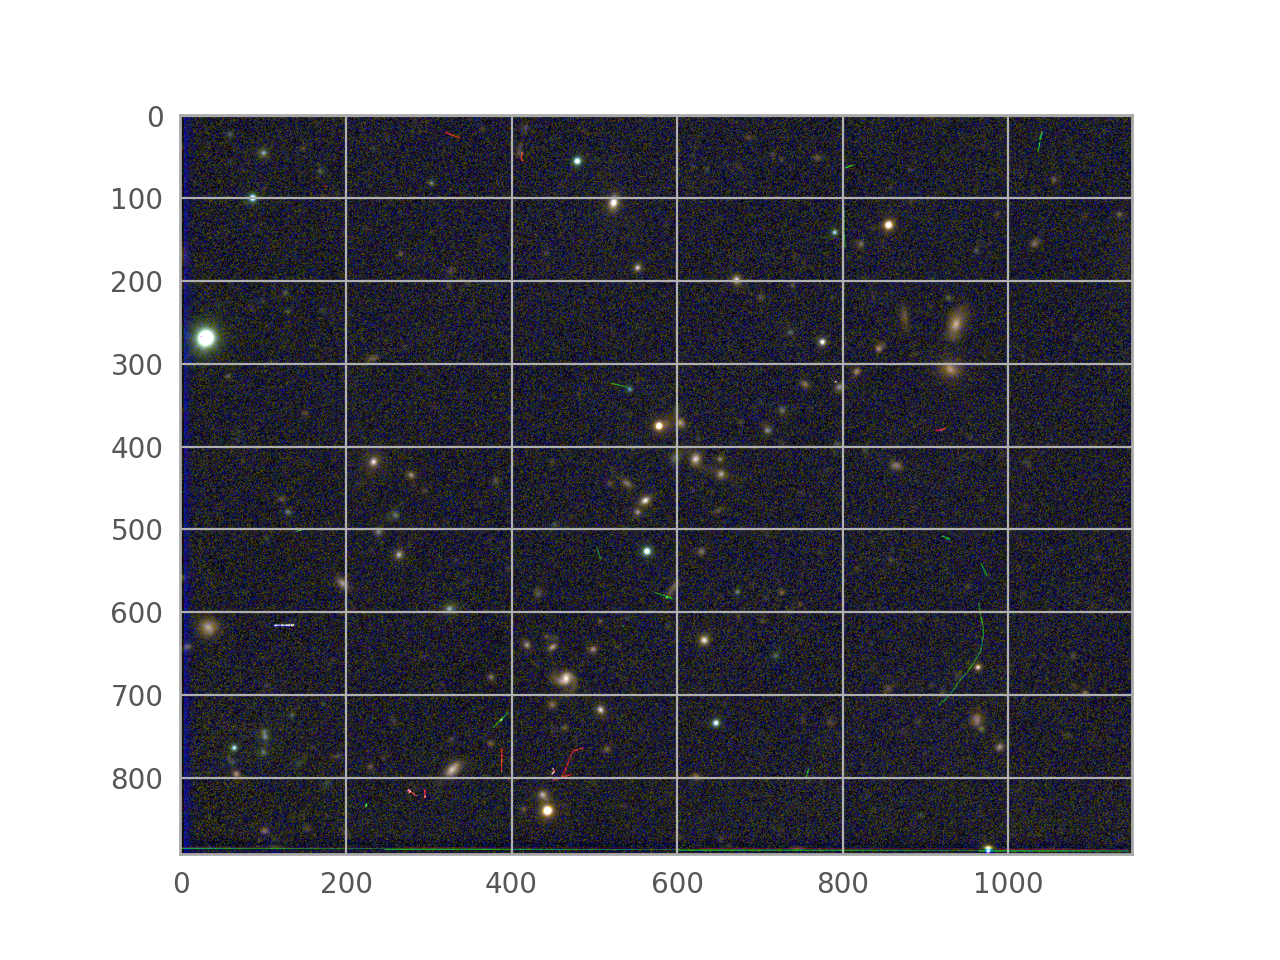

In [7]:
%matplotlib notebook
plt.imshow(tif.imread(rgbfile))

In [8]:
mom_cutout = (70, 110)
max_stds = 50
startstds = 2
step = 5
momstd, momSN, xcent, ycent, xpeak, ypeak = oop.find_SN_sigma(contfile, mom_cutout)
levels = np.ones((max_stds - startstds)//step)*momstd
stds = np.arange(startstds, max_stds, step=step)*momstd
levels = stds

0.09748570003391377 27.90216917282931


In [9]:
rgbdata = tif.imread(rgbfile)
rgbcut = rgbdata[560:815, 563:812, :]

print(rgbdata.shape)

# rgbadd = np.zeros((1376, 1380, 3))
# rgbadd[:,5:,:] = rgbdata

(893, 1150, 3)


In [10]:
opthdr = fits.open('DECam_CDFS-2/r.resamp.fits')[0]
opthdr.header['CD2_2'] = -opthdr.header['CD2_2']
opthdr.header['CRPIX1'] = opthdr.header['CRPIX1'] - 26
opthdr.header['CRPIX2'] = opthdr.header['CRPIX2'] - 3
optwcs = wcs.WCS(opthdr)

<IPython.core.display.Javascript object>


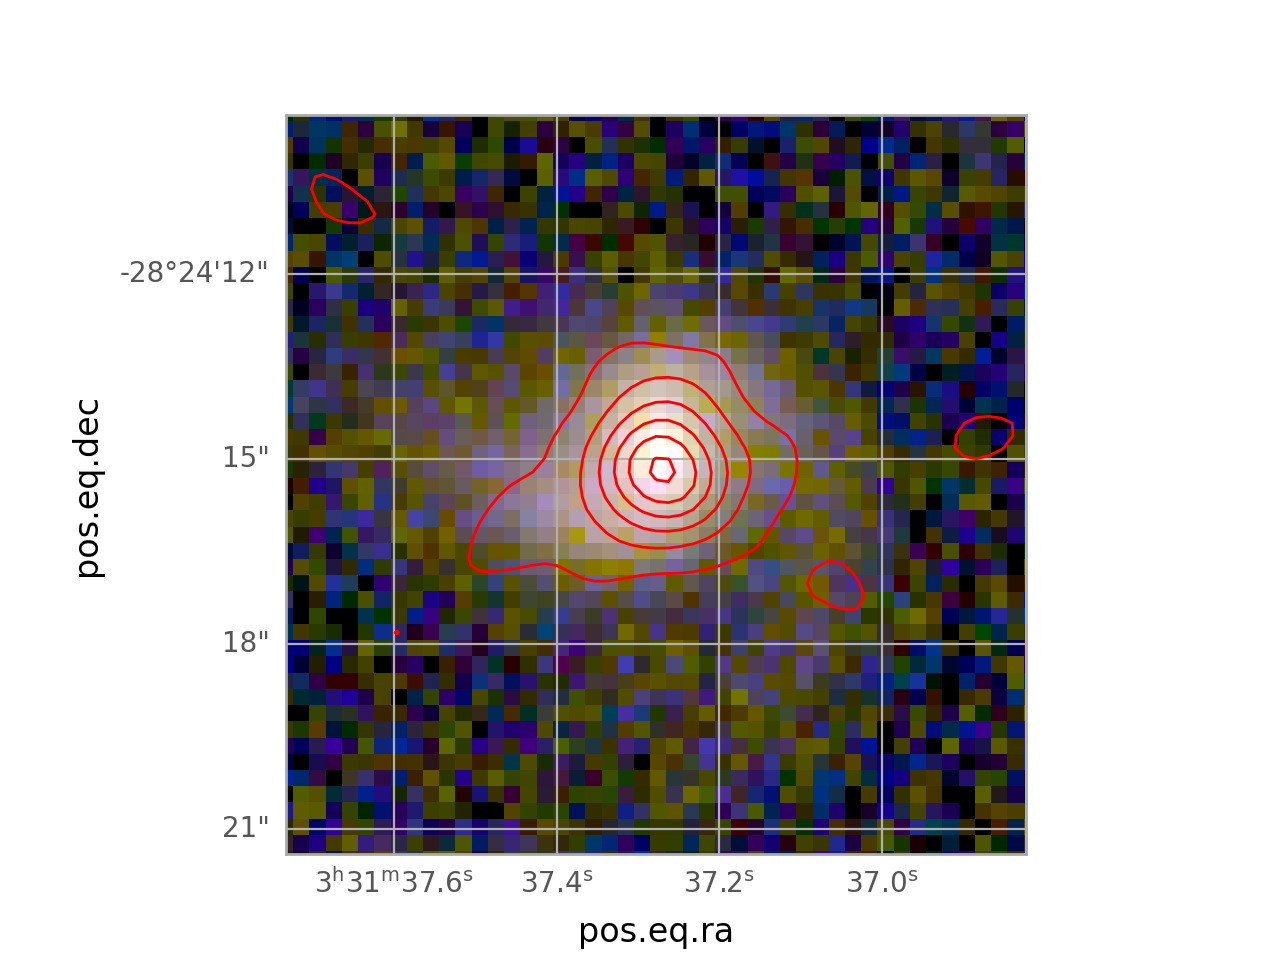

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(60.0, 120.0)

In [11]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = wcs.WCS(fits.open(contfile)[0].header).sub(['celestial']))
ax.contour(fits.open(contfile)[0].data[0,0,:,:], levels=levels, colors='red', zorder=20, linewidths=1)

opttrans = ax.get_transform(optwcs)

plt.imshow(rgbdata, transform=opttrans)

plt.xlim(60,120)
plt.ylim(60,120)

# SOURCE SEARCH ALGORITHM

In [12]:
from photutils import detect_sources, source_properties
#ref: https://photutils.readthedocs.io/en/stable/api/photutils.segmentation.SourceProperties.html#photutils.segmentation.SourceProperties
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import ListedColormap
from astropy.visualization import astropy_mpl_style
from astropy.convolution import Tophat2DKernel
from astropy.modeling.functional_models import Ellipse2D
from math import floor
plt.style.use(astropy_mpl_style)
import astropy.units as u
    

In [13]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/')

nodec = [glob.glob('XMM/XMM-4/calibrated/*100kms_rechan.fits')[0], glob.glob('ES1/ES1-5/calibrated/*100kms_rechan.fits')[0],
        glob.glob('CDFS/CDFS-6/calibrated/*100kms_rechan.fits')[0], glob.glob('CDFS/CDFS-9/calibrated/*100kms_rechan.fits')[0],
        glob.glob('CDFS/CDFS-10/calibrated/*100kms_rechan.fits')[0]]
nodec

# xmm5_cubefiles = glob.glob("*.fits")

# xmm5_cubehduls = []
# for i,file in enumerate(xmm5_cubefiles):
#     with fits.open(file) as hdulist:
#         xmm5_cubehduls.append(hdulist)
#         print("{} {}".format(i, file))

['XMM/XMM-4/calibrated/xmm4_100kms_rechan.fits',
 'ES1/ES1-5/calibrated/es15_100kms_rechan.fits',
 'CDFS/CDFS-6/calibrated/cdfs6_100kms_rechan.fits',
 'CDFS/CDFS-9/calibrated/cdfs9_100kms_rechan.fits',
 'CDFS/CDFS-10/calibrated/cdfs10_100kms_rechan.fits']

In [14]:
dec = ['CDFS/CDFS-2/calibrated/cdfs2rechan.fits', 'CDFS/CDFS-11/calibrated/cdfs11rechan.fits']
dec

['CDFS/CDFS-2/calibrated/cdfs2rechan.fits',
 'CDFS/CDFS-11/calibrated/cdfs11rechan.fits']

In [15]:
checkfiles = ['CDFS/CDFS-2/calibrated/cdfs2rechan.stackcheck.specprof.txt', 
             'CDFS/CDFS-11/calibrated/cdfs11rechan.stackcheck.specprof.txt']

In [16]:
with open(checkfiles[0]) as file:
    specprof = np.genfromtxt(file)
vel2, flux2 = specprof[:, 0], specprof[:, 1]
cent2 = len(vel2) // 2
min2, max2 = cent2 - 20, cent2 + 20
flux2 = flux2[min2:max2]

with open(checkfiles[1]) as file:
    specprof= np.genfromtxt(file)
vel11, flux11 = specprof[:, 0], specprof[:, 1]
cent11 = len(vel11) // 2
min11, max11 = cent11 - 20, cent11 + 20
flux11 = flux11[min11:max11]

avgflux = np.mean((flux2, flux11), axis=0)

<IPython.core.display.Javascript object>


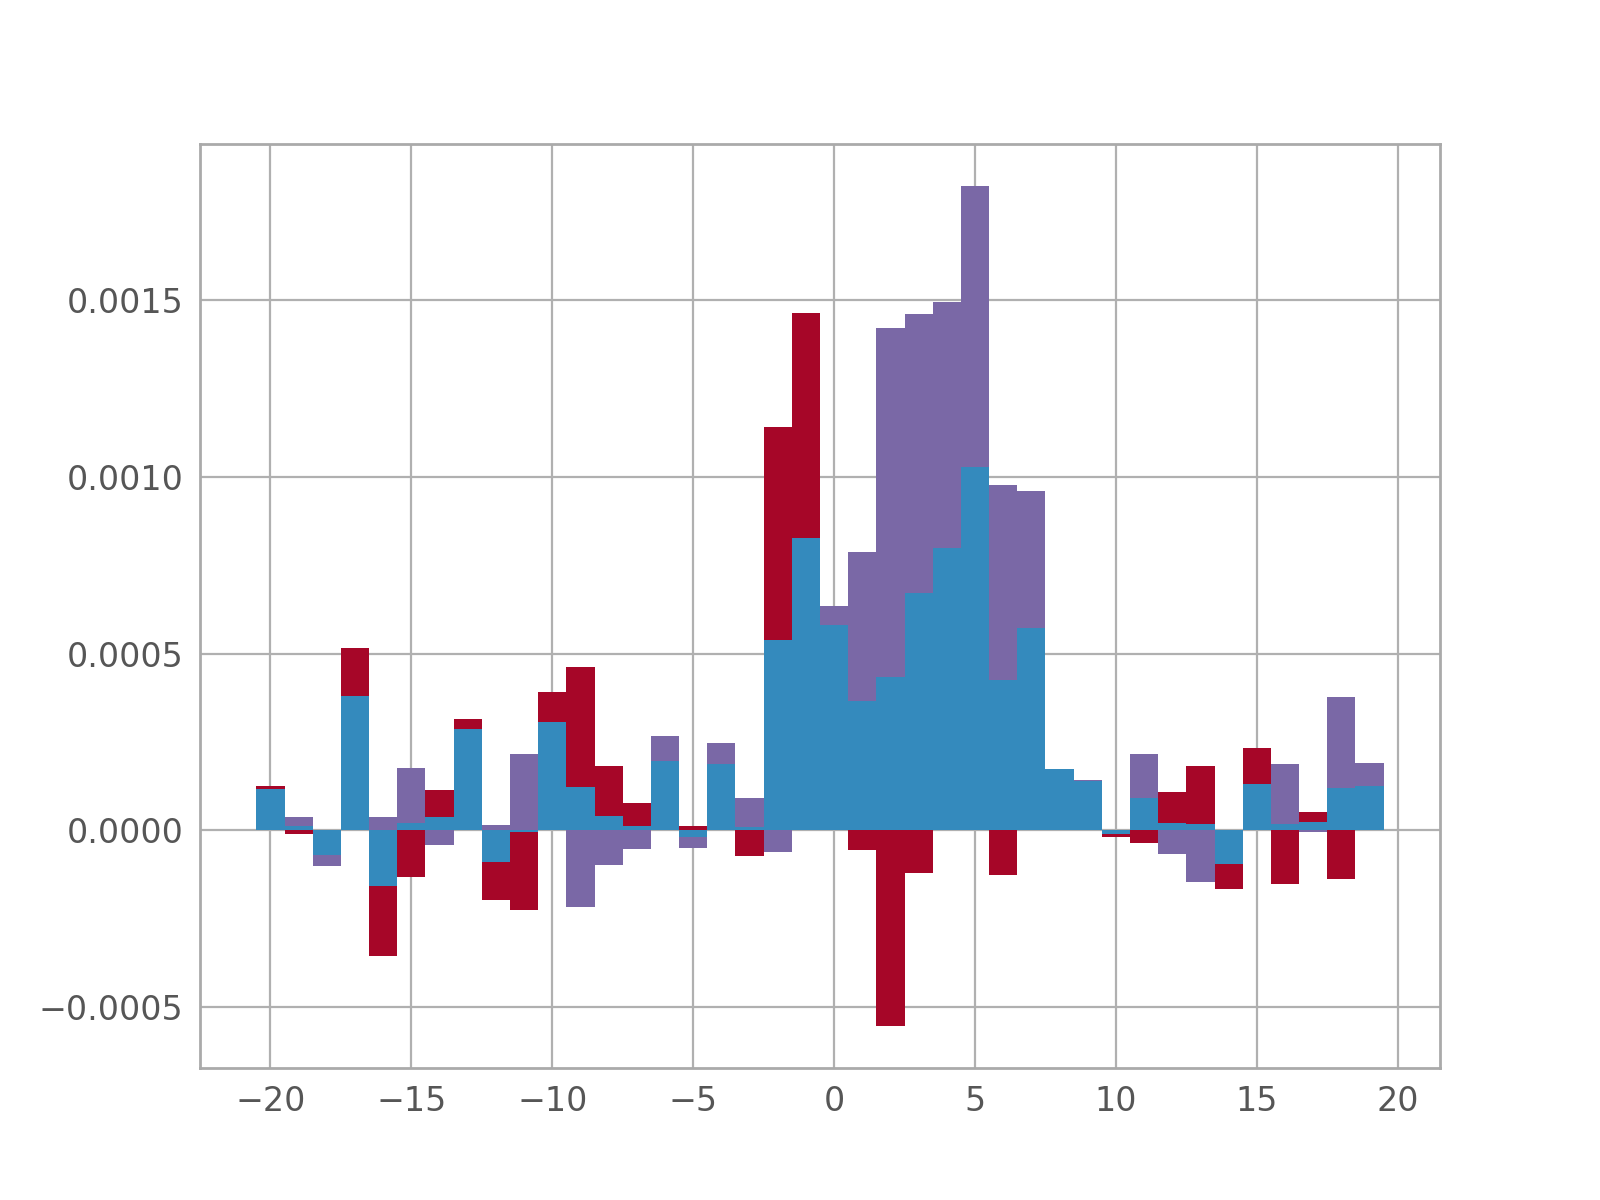

<BarContainer object of 40 artists>

In [17]:
%matplotlib notebook

plt.bar(np.arange(-20, 20), avgflux, width=1, zorder=10)
plt.bar(np.arange(-20, 20), flux2, width=1)
plt.bar(np.arange(-20, 20), flux11, width=1)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


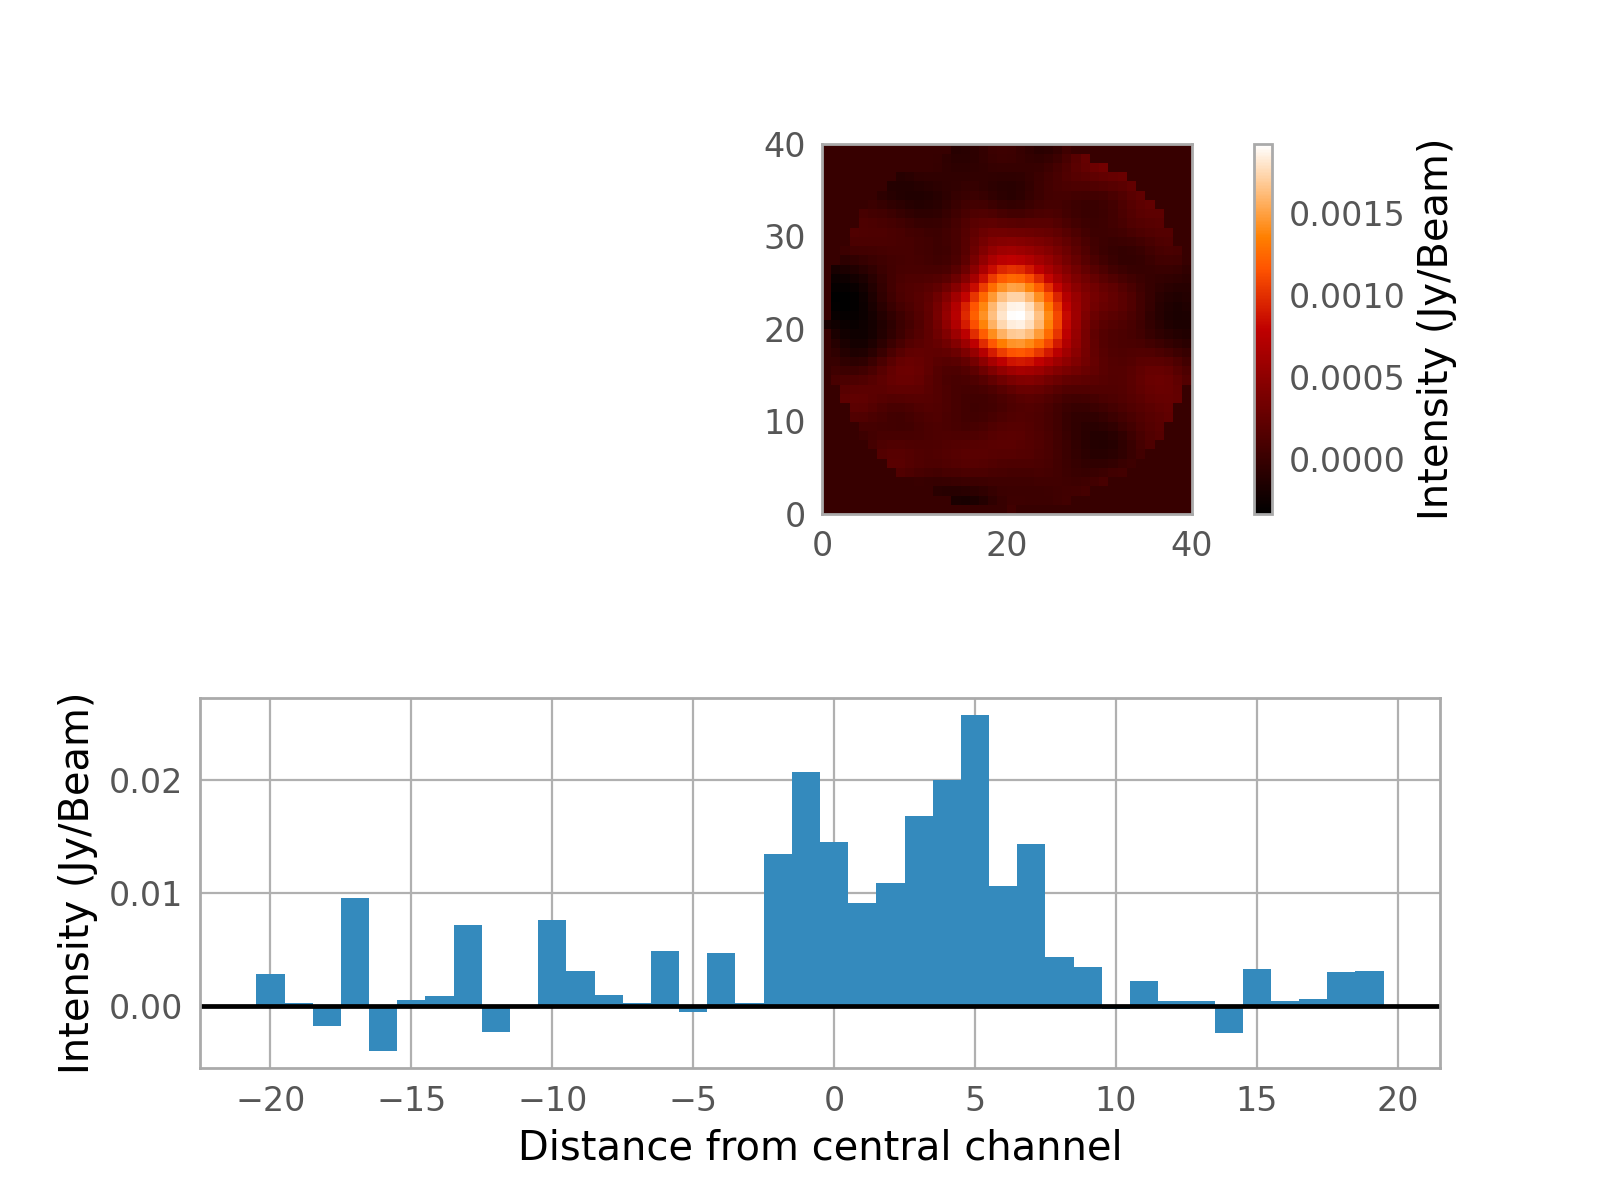

In [18]:
%matplotlib notebook
# (files, nchans, rwindow, profonly=False, imonly=False, sigma=None)
_, myavgflux = ss.image_stack(dec, 40, 20);

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


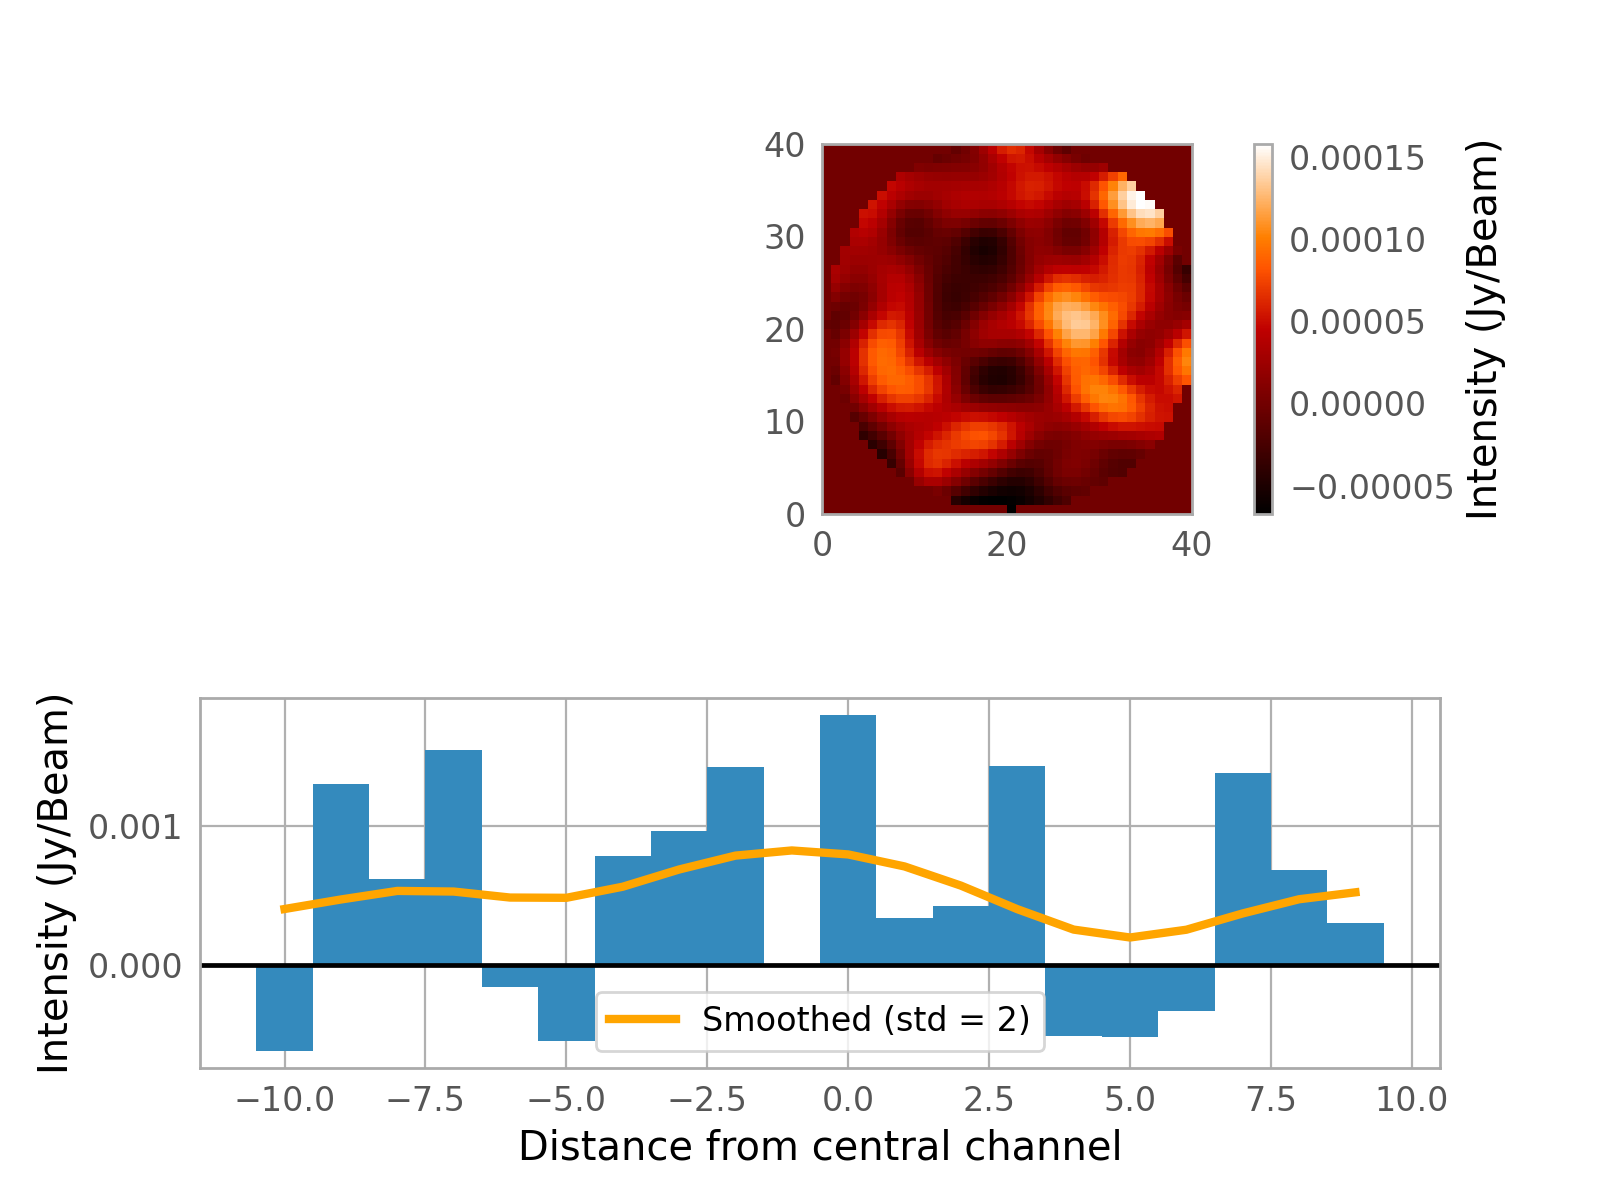

In [19]:
%matplotlib notebook

nodecim, nodecprof = ss.image_stack(nodec, 20, 20, sigma=2)

In [20]:
stackcentarr = [(40, 40), (40, 80), (80, 40), (120, 120), (80, 120)]

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


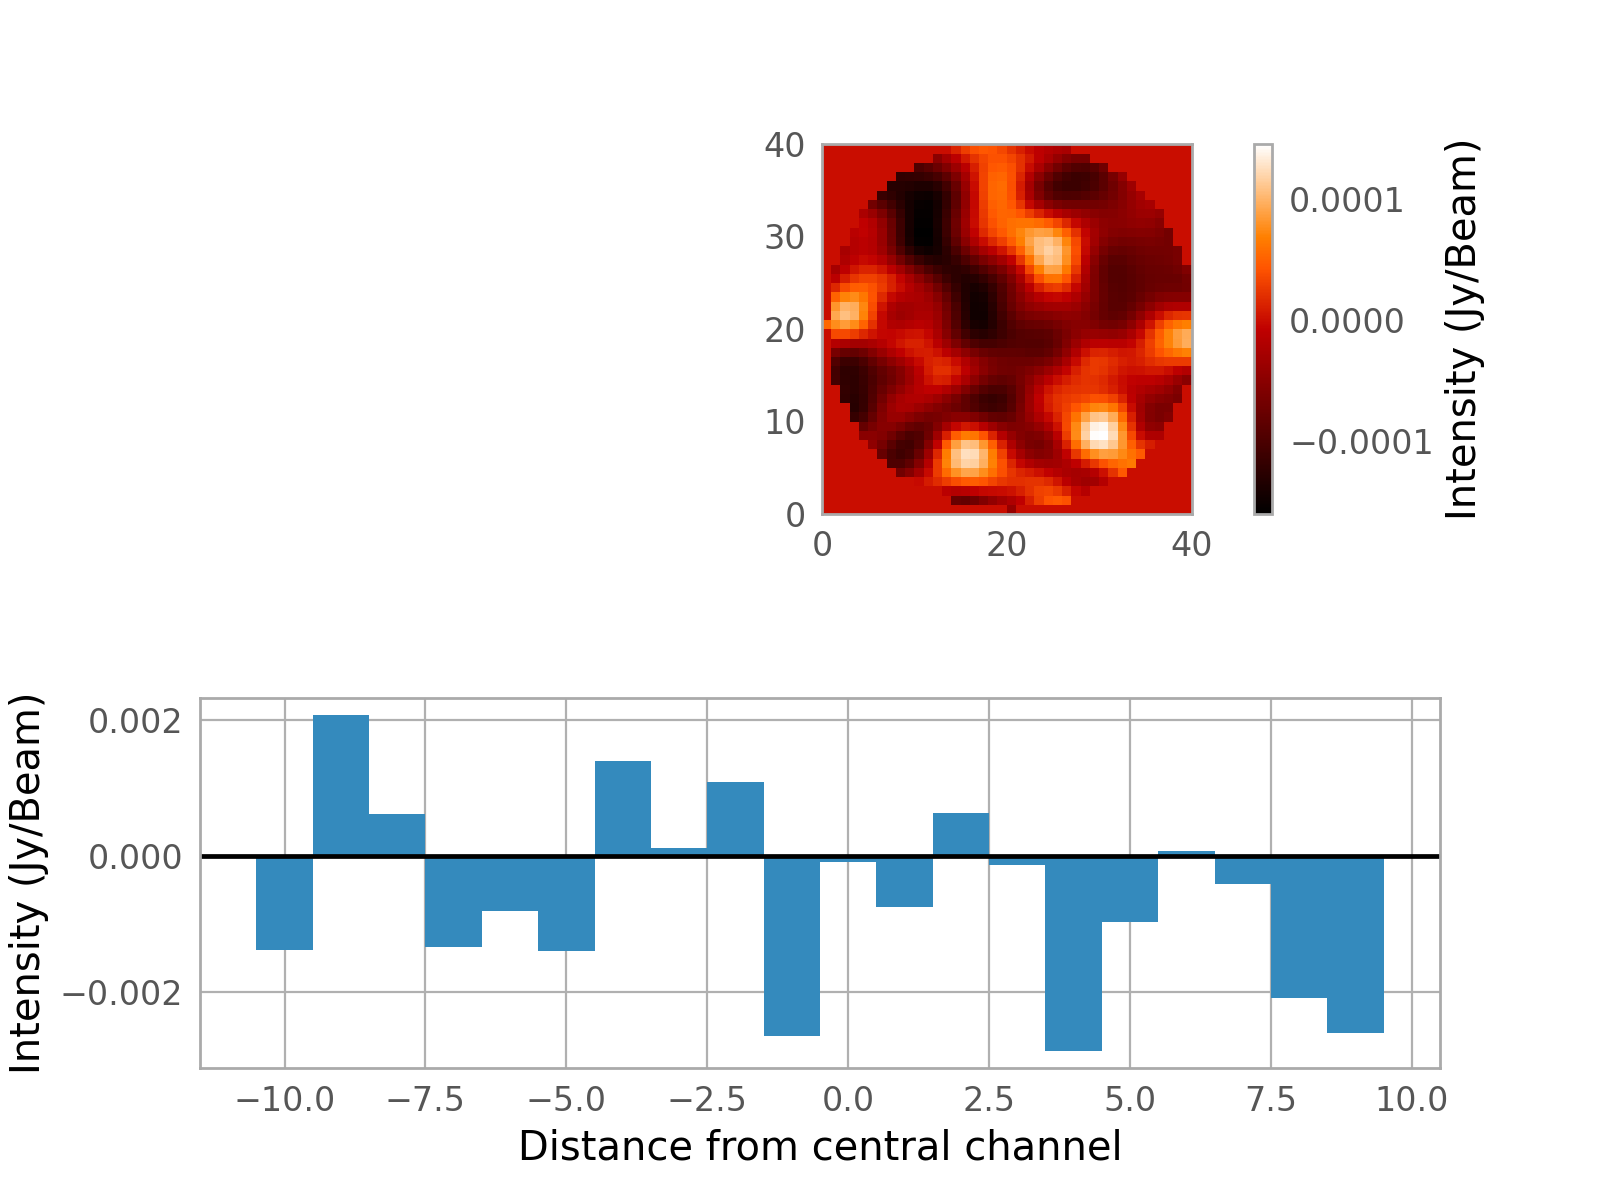

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


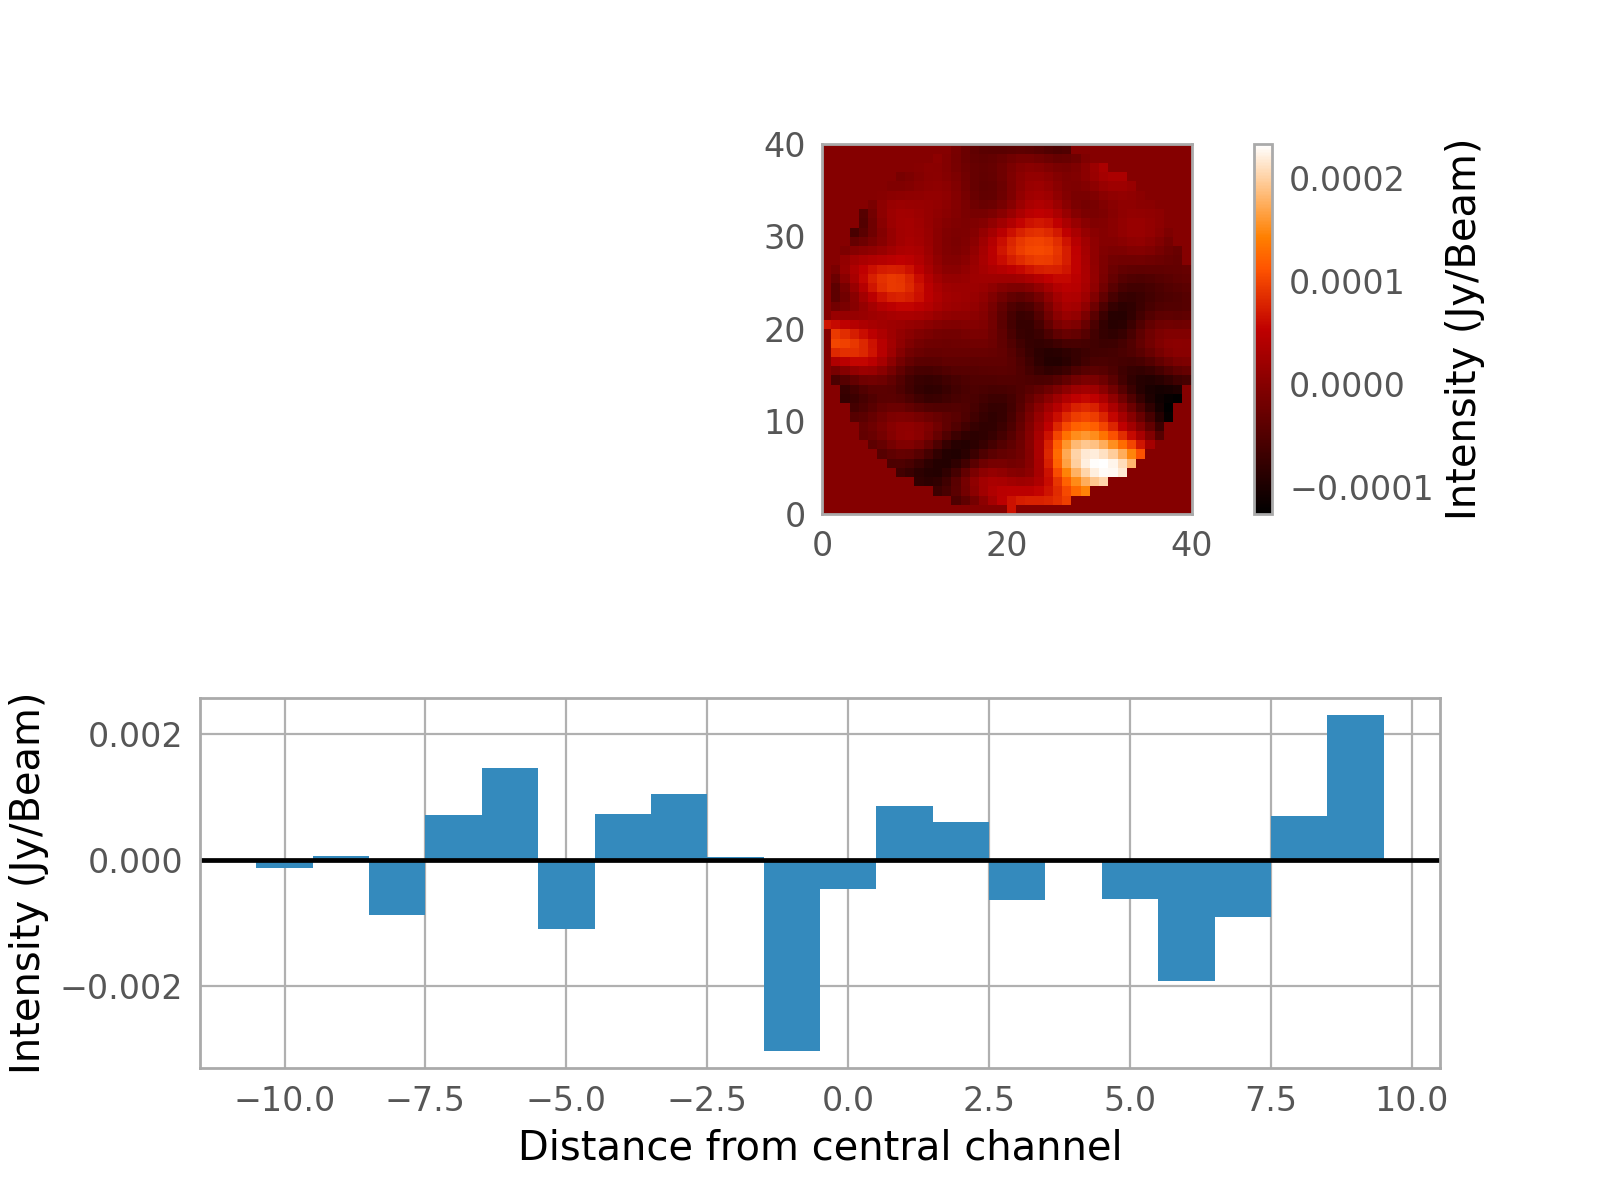

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


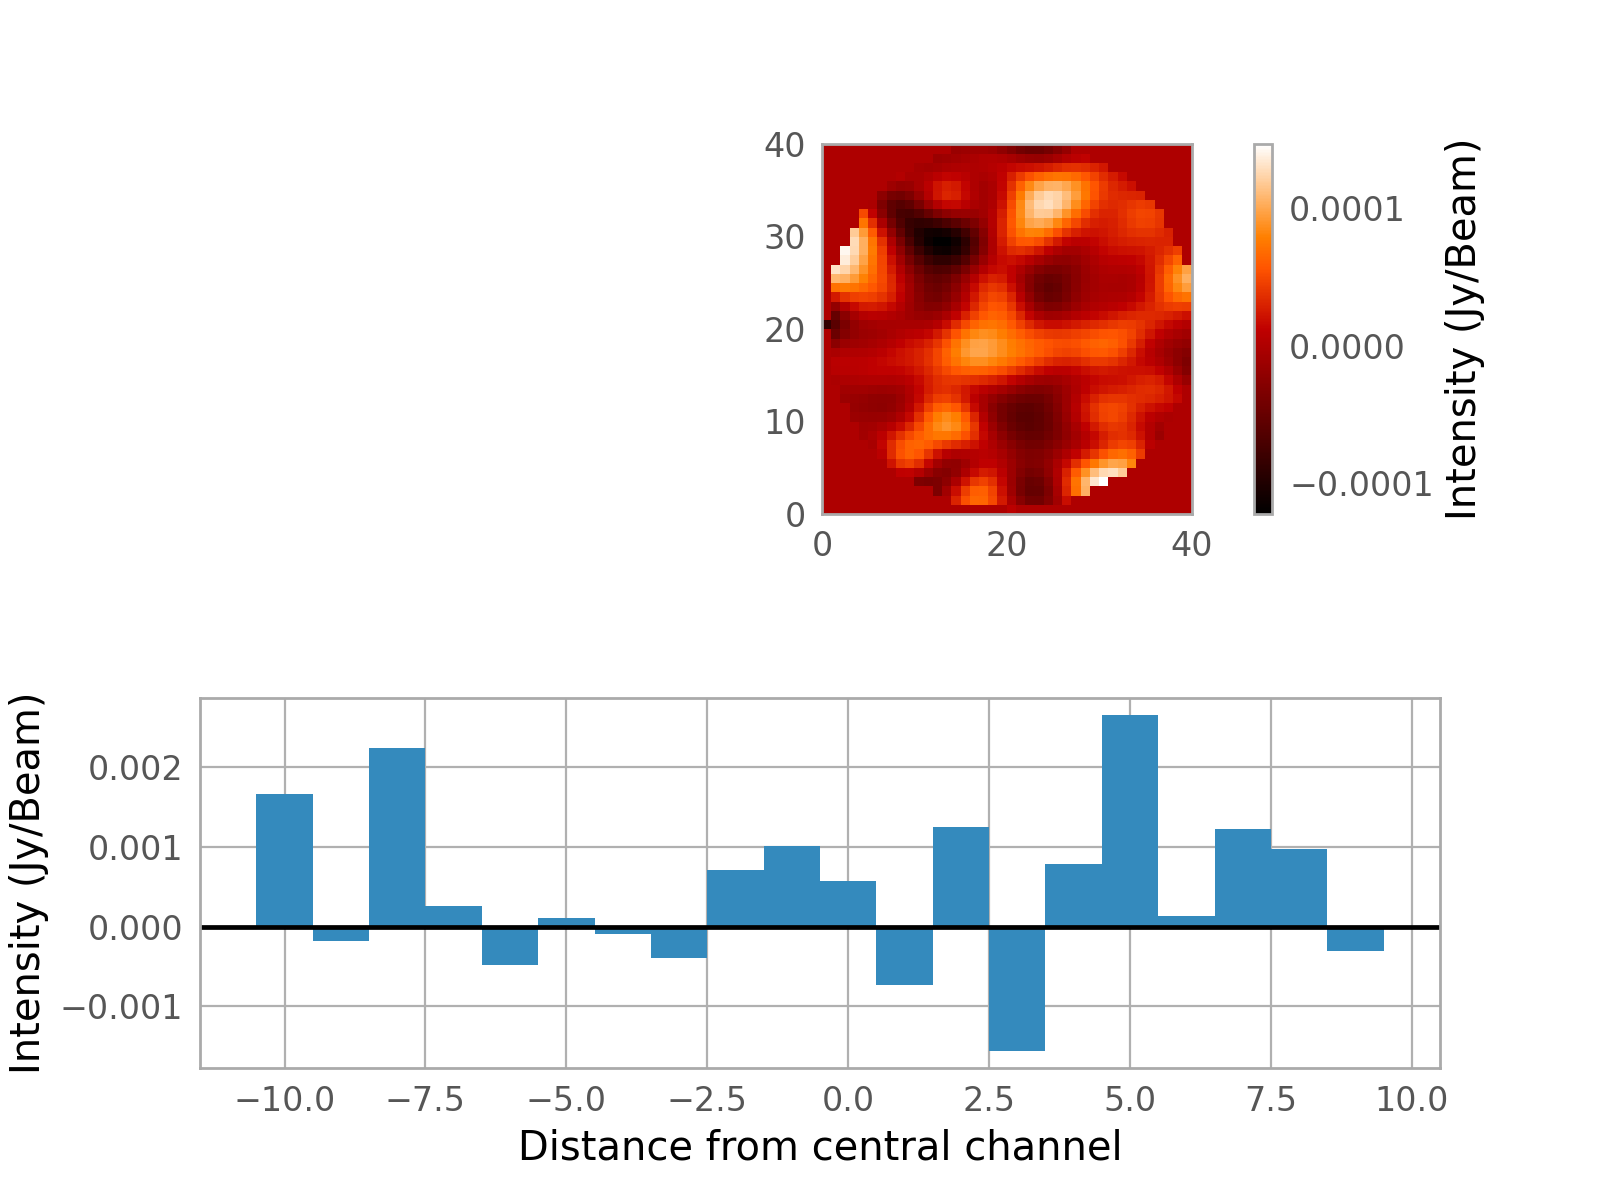

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


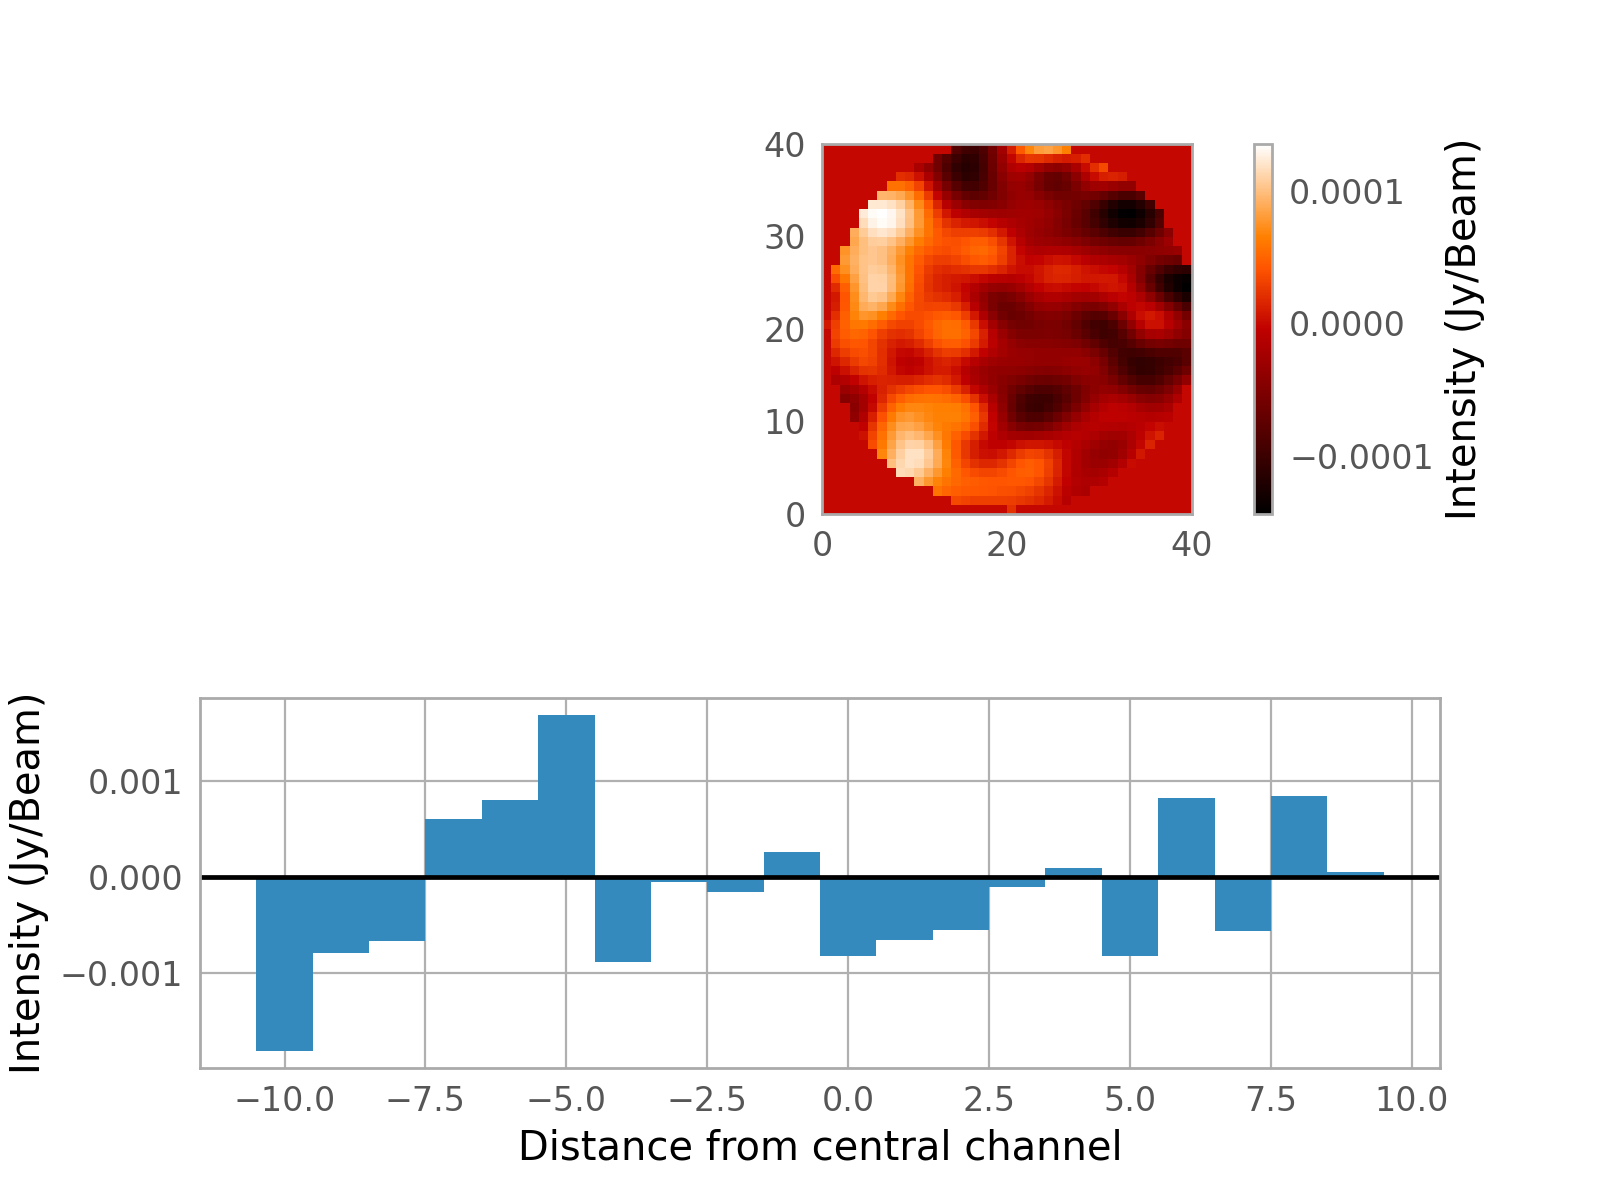

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


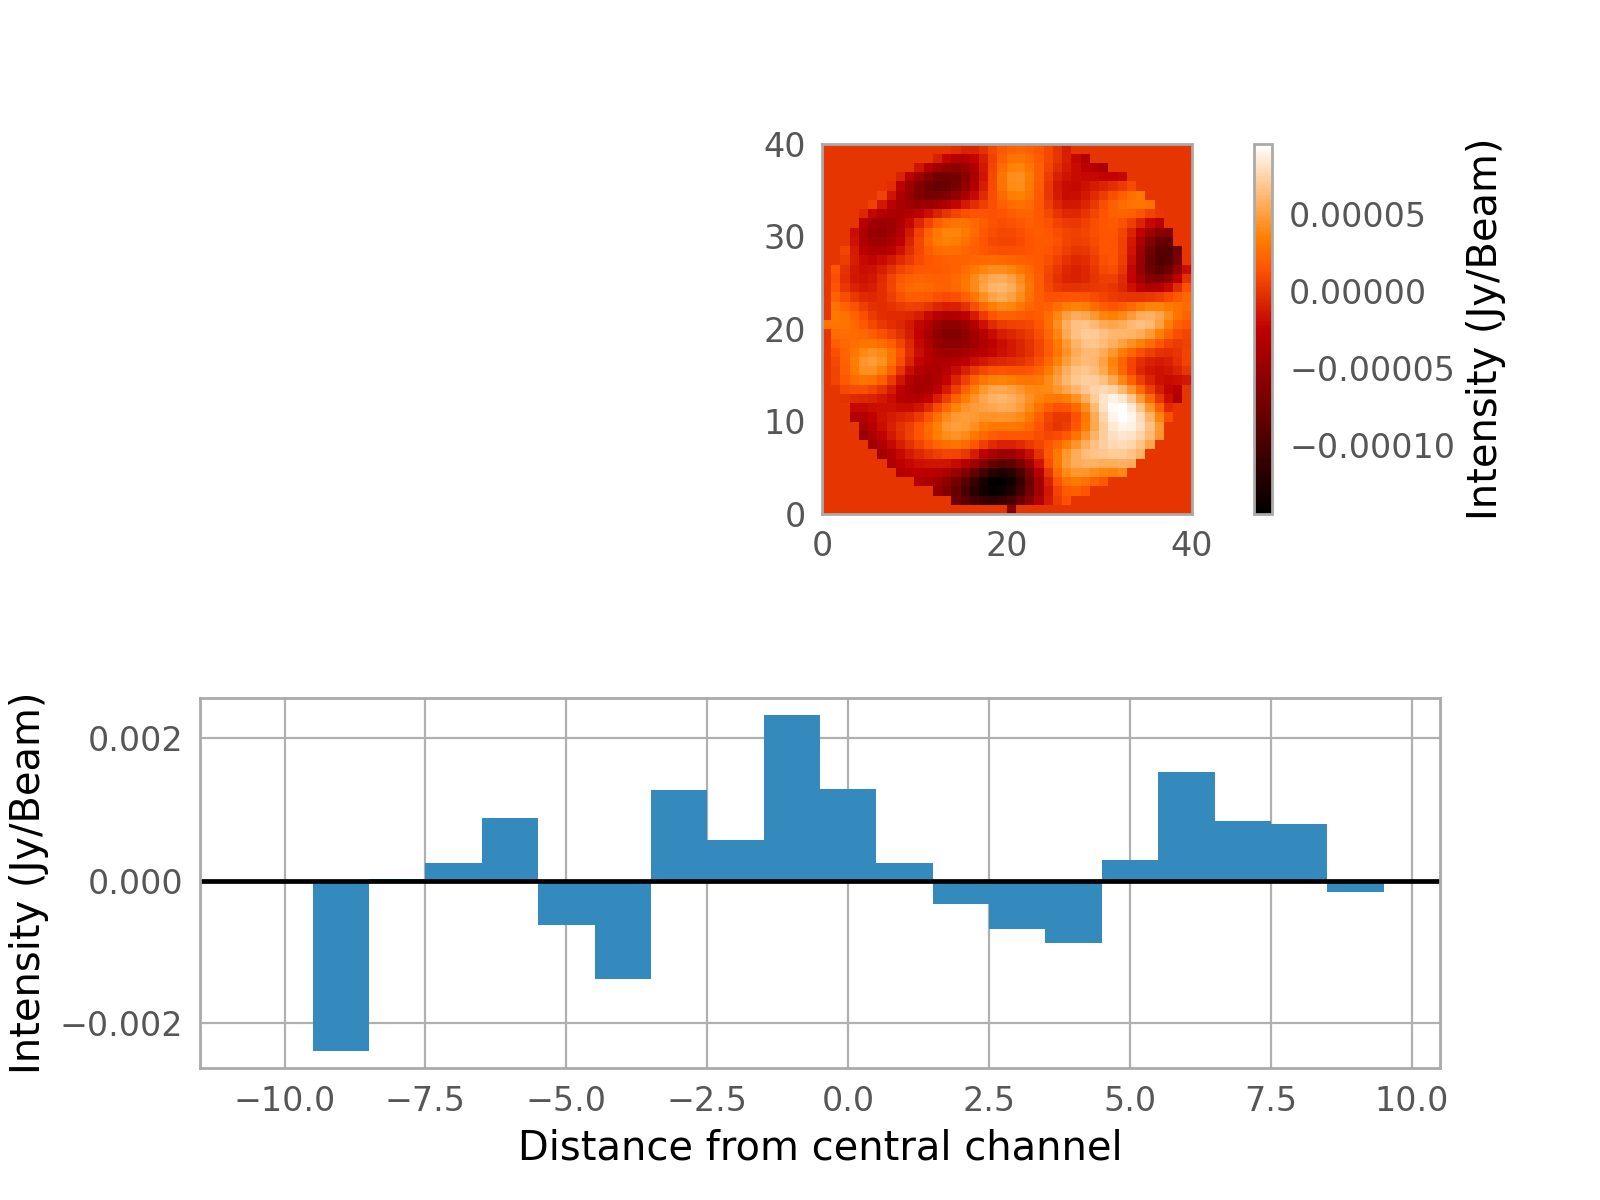

In [21]:
imlist = []
proflist = []
for scent in stackcentarr:
    im, prof = ss.image_stack(nodec, 20, 20, stackcenter=scent)
    imlist.append(im)
    proflist.append(prof)


<IPython.core.display.Javascript object>


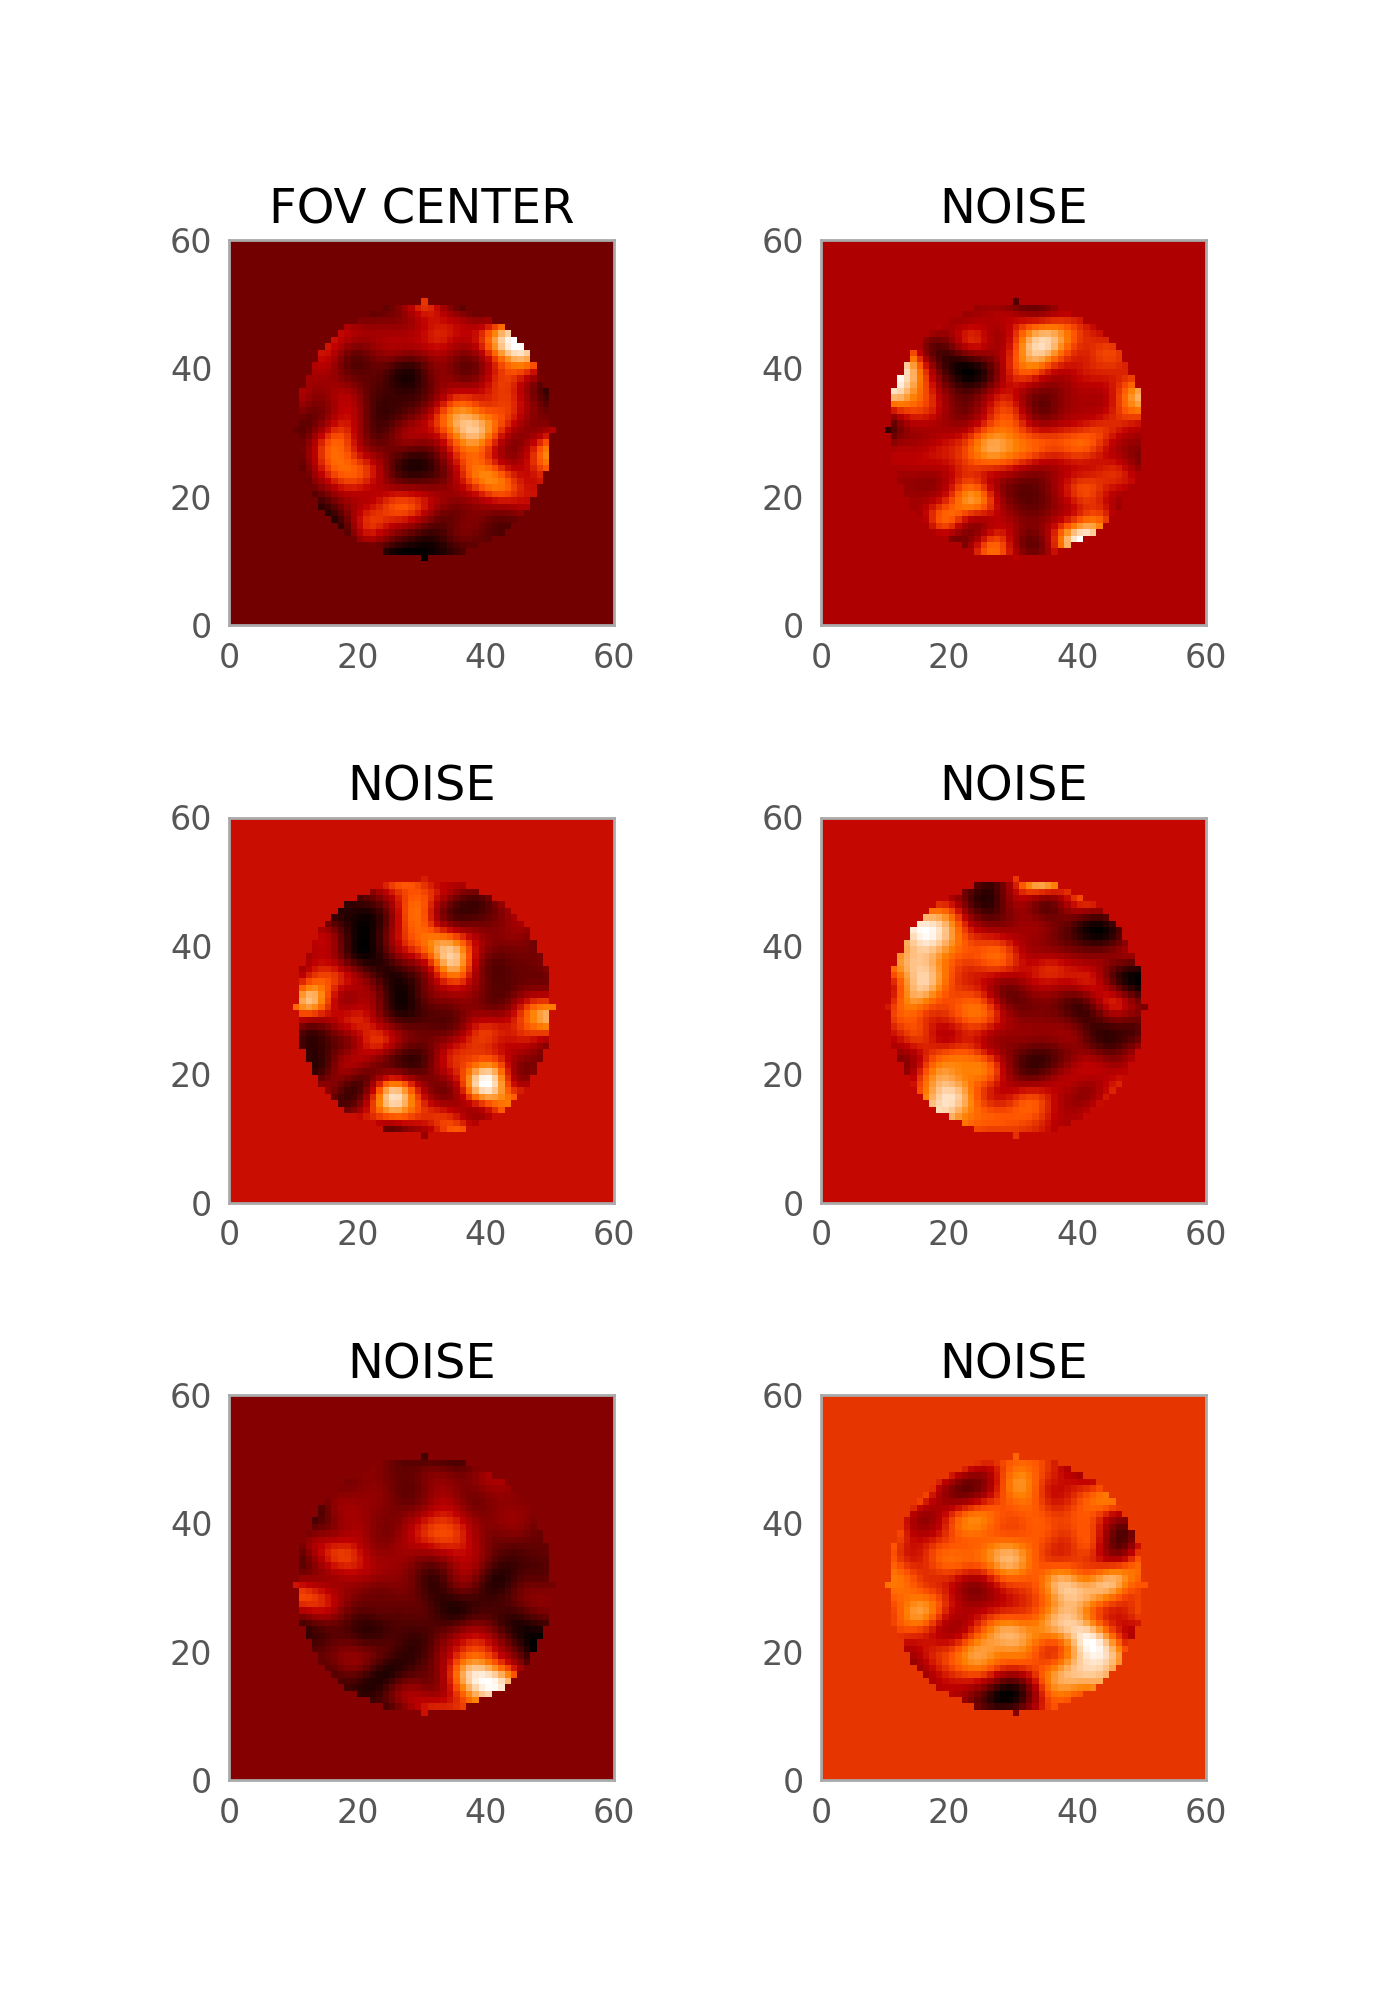

In [22]:
%matplotlib notebook

fig, axs = plt.subplots(3, 2, figsize=(7, 10))

axs[0,0].pcolormesh(nodecim[50:110, 50:110])
axs[0,0].set_aspect(aspect=1)
axs[0,0].set_title('FOV CENTER')

for i, im in enumerate(imlist):
    i += 1
    axs[i % 3, i // 3].pcolormesh(im[50:110, 50:110])
    axs[i % 3, i // 3].set_aspect(aspect=1)
    axs[i % 3, i // 3].set_title('NOISE')

<IPython.core.display.Javascript object>


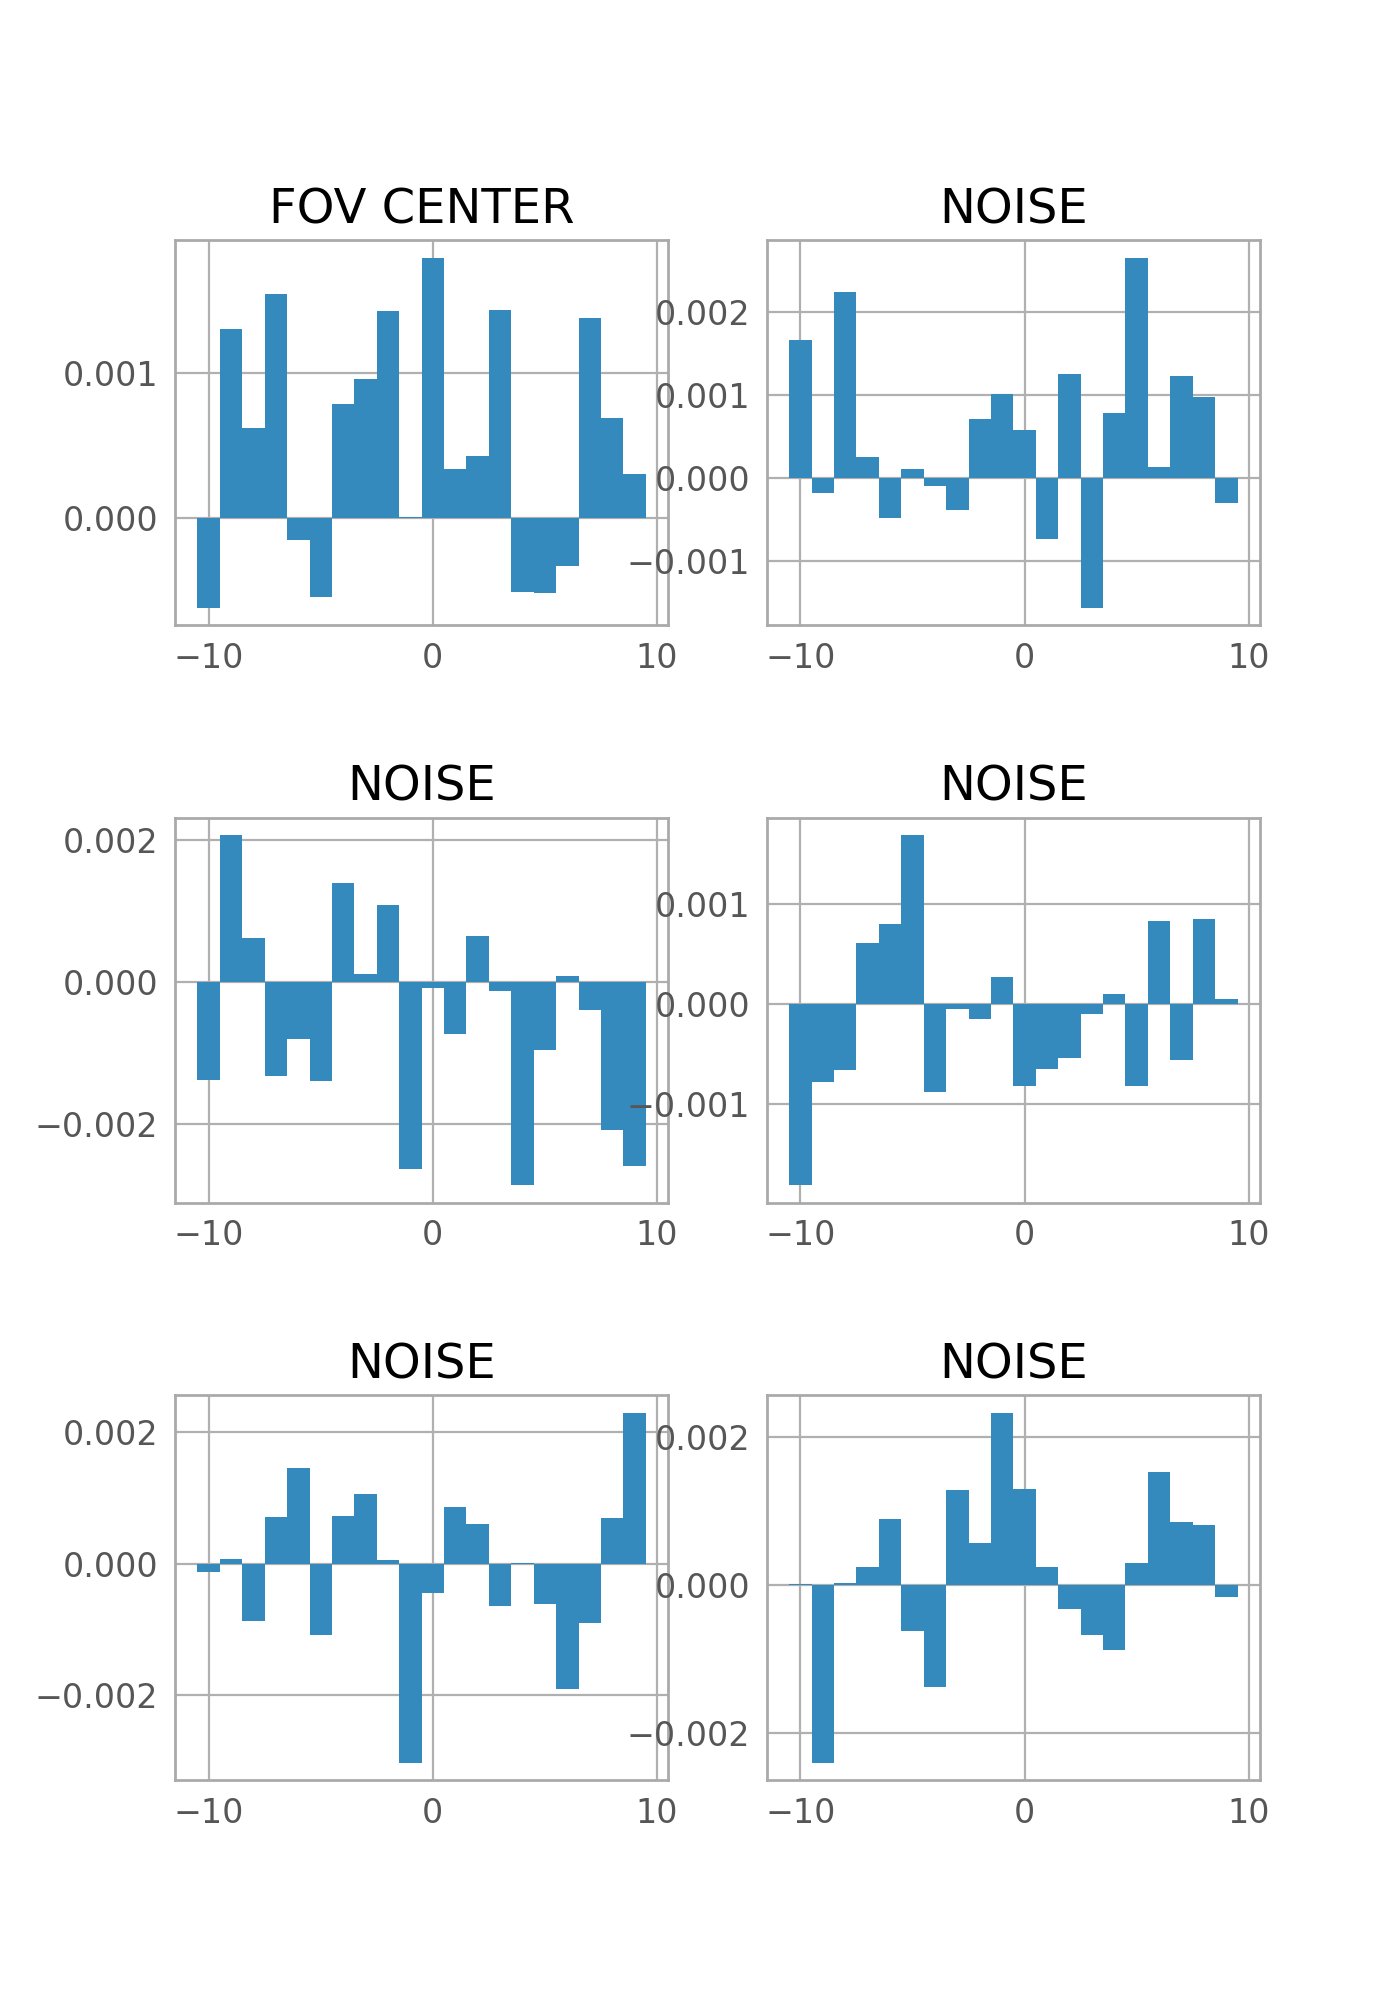

In [23]:
%matplotlib notebook

fig, axs = plt.subplots(3, 2, figsize=(7, 10))

axs[0,0].bar(np.arange(-10, 10), nodecprof, width=1)
axs[0,0].set_title('FOV CENTER')

for i, prof in enumerate(proflist):
    i += 1
    axs[i % 3, i // 3].bar(np.arange(-10, 10), prof, width=1)
    axs[i % 3, i // 3].set_title('NOISE')

## XMM-8 3-Gaussian Fit

In [25]:
# def get_vel_from_txt(specfile, p0=[0.3, 67200, 50, 0], centmean=True, p02=None, linefree=(0,50), n_gauss=None,
#                      zvals=(90, 160), z=None, centline=False):
# load in the spectral profile from the file
from scipy.integrate import quad

def threegaussian(x, amp1, amp2, amp3, mu1, mu2, mu3, sig1, sig2, sig3, C):
    gauss1 = amp1 * np.exp(-np.power(x - mu1, 2.) / (2 * np.power(sig1, 2.)))  # + C
    gauss2 = amp2 * np.exp(-np.power(x - mu2, 2.) / (2 * np.power(sig2, 2.)))  # + C
    gauss3 = amp3 * np.exp(-np.power(x - mu3, 2.) / (2 * np.power(sig3, 2.)))
    return gauss1 + gauss2 + gauss3

os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/XMM/XMM-8/calibrated/')
specfile = glob.glob('*rechan*.txt')[0]
p0 = [0.01, 0.003, 0.01, -300, -100, 50, 50, 100, 50, 0]
linefree=(0,50)
zvals=(90,160)

specprof = np.genfromtxt(specfile)
vel, flux = specprof[:, 0], specprof[:, 1]

zmin,zmax = zvals[0], zvals[1]

# xarray to fit
x = np.linspace(np.min(vel), np.max(vel), num=500)

fig, axs = plt.subplots(1, figsize=(10, 4))

# plot the intensity data to make sure the fit worked
axs.bar(vel, flux * 1e3, width=np.abs(vel[1] - vel[0]))
axs.set_xlabel('Velocity (km/s), LSRK)')
axs.set_ylabel('Integrated Intensity (mJy)')

# fit to three gaussians
opt1, cov1 = curve_fit(threegaussian, vel, flux, p0=p0)

# find the reduced chi-squared value for each fit
rms1, chi1 = co.rms_chi(flux[zmin:zmax], threegaussian(vel[zmin:zmax], *opt1), 12, linefree=linefree)

# print out the chi-squared values for each fit
print("chi-squared for three Gaussian: {:.3f}".format(chi1))

rms = rms1
opt = opt1

axs.plot(x, threegaussian(x, *opt1) * 1e3, color='orange')

# find area under gaussian fit - integration means -> Jy*km/s
specmax1 = quad(threegaussian, np.min(vel), np.max(vel),
                args=(opt1[0], opt1[1], opt1[2], opt1[3], opt1[4], opt1[5], opt1[6], opt1[7], opt1[8], 0))[0]
print("Three-gaussian integrated flux: {:.3e} Jy km/s".format(specmax1))

specmax = specmax1
freq_to_vel = u.doppler_radio(230.528 * u.GHz)
hzmean = (np.mean((opt1[3], opt1[4], opt1[5])) * u.km / u.s).to(u.Hz, equivalencies=freq_to_vel)


centfreq = 230.538 * u.GHz / (1 + z)
# centvel = centfreq.to(u.km / u.s, equivalencies=freq_to_vel)

axs.axvline(x=0, zorder=20, color='k')

<IPython.core.display.Javascript object>

/Users/dee/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


AttributeError: module 'co_masses' has no attribute 'rms_chi'